#RetailPlus

##Contexto del Caso


- **Evolución de RetailPlus:** RetailPlus es un actor destacado en el sector minorista peruano que ha pasado de ser un distribuidor de abarrotes a un negocio mayorista y minorista, con ventas a clientes institucionales y a través de canales digitales.

- **Diversidad de Clientes:** Su cartera incluye desde pequeños comercios hasta grandes cadenas de empresas, con distintos volúmenes de compras, patrones de pago y necesidades logísticas.

- **Desafíos Operacionales:** La empresa enfrenta retos en áreas clave como la gestión del inventario, predicción de la demanda y toma de decisiones sobre precios y condiciones de pago.

- **Impacto en Rentabilidad:** Estos desafíos afectan directamente la rentabilidad y el flujo de caja de la empresa, lo que hace necesario un enfoque más eficiente basado en datos.

##Problema Central


- **Optimización de Rentabilidad:** El principal desafío es optimizar la rentabilidad utilizando inteligencia de datos.

- **Predicciones de Demanda:** Las predicciones imprecisas sobre la demanda están causando exceso de inventario y quiebres de stock.

- **Condiciones de Pago:** La gestión de las condiciones de pago no siempre es eficiente, lo que afecta el flujo de caja de la empresa.

- **Modelos de Pronóstico Inadecuados:** Los modelos tradicionales no son suficientes para lidiar con la volatilidad económica y el comportamiento cambiante de los consumidores en la era digital.

##Catálogo de Variables
El conjunto de datos contiene variables clave que describen tanto las características del cliente como de los productos, así como detalles de las transacciones:

1. **FECHA_FACTURA** (**Fecha**): Fecha en que se emitió la factura para la transacción.
2. **COD_CLIENTE** (**Categórico**): Identificador único del cliente que realizó la compra.
3. **SECTOR_CLIENTE** (**Categórico**): Sector económico al que pertenece el cliente.
4. **RUBRO_CLIENTE** (**Categórico**): Rubro específico del negocio del cliente, más detallado que el sector.
5. **COD_MATERIAL** (**Categórico**): Identificador único del material o producto vendido.
6. **MARCA** (**Categórico**): Marca del producto vendido.
7. **REGION** (**Categórico**): Región geográfica donde se encuentra el cliente o se realizó la entrega.
8. **PROVINCIA** (**Categórico**): Provincia donde se encuentra el cliente o se realizó la entrega.
9. **DISTRITO** (**Categórico**): Distrito donde se encuentra el cliente o se realizó la entrega.
10. **CIUDAD** (**Categórico**): Ciudad donde se encuentra el cliente o se realizó la entrega.
11. **CENTRO_DESPACHO** (**Categórico**): Código del centro de despacho desde donde se envió el producto.
12. **CONDICION_PAGO** (**Categórico**): Término de pago acordado para la transacción.
13. **FACTURA** (**Numérico**): Número de factura único para la transacción.
14. **UNIDAD_MEDIDA** (**Categórico**): Unidad de medida utilizada para la cantidad del producto (ej. litros, kilogramos, unidades).
15. **Cantidad** (**Numérico**): Cantidad de unidades del producto vendido en esta transacción.
16. **Monto USD** (**Numérico**): Monto total de la transacción en dólares estadounidenses.


## Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de archivo

In [ ]:
df_dataset = pd.read_csv('dataset_module2.txt')

In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60045 entries, 0 to 60044
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FECHA_FACTURA    60045 non-null  object 
 1   COD_CLIENTE      60045 non-null  int64  
 2   SECTOR_CLIENTE   59907 non-null  object 
 3   RUBRO_CLIENTE    59907 non-null  object 
 4   COD_MATERIAL     60045 non-null  int64  
 5   COD_MARCA        60045 non-null  object 
 6   REGION           60045 non-null  object 
 7   PROVINCIA        60045 non-null  object 
 8   DISTRITO         60045 non-null  object 
 9   CIUDAD           59907 non-null  object 
 10  CENTRO_DESPACHO  59929 non-null  object 
 11  CONDICION_PAGO   60045 non-null  object 
 12  FACTURA          60045 non-null  int64  
 13  UNIDAD_MEDIDA    60045 non-null  object 
 14  Cantidad         60045 non-null  float64
 15  Flete            60045 non-null  float64
 16  Monto USD        60045 non-null  float64
dtypes: float64(3

In [ ]:
df_dataset.sample(5)

FECHA_FACTURA  COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL  \
9506     2020-11-03        12849        EMPRESA        TEXTIL             3   
32537    2022-10-25        10004        EMPRESA      AGRICOLA            10   
6271     2020-07-18        16600    TRADICIONAL  DISTRIBUIDOR            14   
35691    2023-01-31        18516    TRADICIONAL  DISTRIBUIDOR            14   
26217    2022-04-16        16783    TRADICIONAL  DISTRIBUIDOR            25   

      COD_MARCA    REGION PROVINCIA               DISTRITO   CIUDAD  \
9506          B      Lima      LIMA  S. JUAN DE LURIGANCHO     LIMA   
32537         B      Lima      LIMA             CHORRILLOS     LIMA   
6271          C     Tacna     TACNA                  TACNA      ILO   
35691         C    Ancash    HUARAZ                 HUARAZ   HUARAZ   
26217         C  Apurimac   ABANCAY                ABANCAY  ABANCAY   

      CENTRO_DESPACHO     CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad  \
9506             PE20  Factura a 60 días  15150787            TO     17.00   
32537            PE22  Factura a 90 días  15173460            TO     10.00   
6271             PE23  Factura a 15 días  15147942            TO     29.25   
35691            PE23   Factura a 7 días  55024208            TO      0.00   
26217            PE23   Factura a 7 días  15167560            TO     30.29   

         Flete  Monto USD  
9506     83.47     936.53  
32537    48.70    1551.30  
6271   2540.94    4167.15  
35691     0.00    -878.16  
26217  1762.02    4711.59

## Limpieza y preparación de datos

In [ ]:
df_dataset.isnull().sum()

FECHA_FACTURA        0
COD_CLIENTE          0
SECTOR_CLIENTE     138
RUBRO_CLIENTE      138
COD_MATERIAL         0
COD_MARCA            0
REGION               0
PROVINCIA            0
DISTRITO             0
CIUDAD             138
CENTRO_DESPACHO    116
CONDICION_PAGO       0
FACTURA              0
UNIDAD_MEDIDA        0
Cantidad             0
Flete                0
Monto USD            0
dtype: int64

Cantidad de valores nulos por cada variable.

### Análisis de valores nulos

- Se revisan los valores nulos para SECTOR_CLIENTE


In [ ]:
mask = df_dataset['SECTOR_CLIENTE'].isnull()
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates().reset_index(drop=True)
df_filtrado

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE      REGION PROVINCIA  \
0        17528            NaN           NaN         Ica   CHINCHA   
1        16481            NaN           NaN        Lima      LIMA   
2        17822            NaN           NaN         Ica       ICA   
3        17015            NaN           NaN        Lima      LIMA   
4        18283            NaN           NaN  Lambayeque  CHICLAYO   

              DISTRITO CIUDAD  
0         GROCIO PRADO    NaN  
1           SAN ISIDRO    NaN  
2          LA TINGUIÑA    NaN  
3    SANTIAGO DE SURCO    NaN  
4  JOSE LEONARDO ORTIZ    NaN

In [ ]:
mask = df_dataset['COD_CLIENTE'] == 17528
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE REGION PROVINCIA      DISTRITO  \
746        17528            NaN           NaN    Ica   CHINCHA  GROCIO PRADO   

    CIUDAD  
746    NaN

In [ ]:
mask = df_dataset['COD_CLIENTE'] == 16481
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE REGION PROVINCIA    DISTRITO  \
8157        16481            NaN           NaN   Lima      LIMA  SAN ISIDRO   

     CIUDAD  
8157    NaN

In [ ]:
mask = df_dataset['COD_CLIENTE'] == 17822
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE REGION PROVINCIA     DISTRITO  \
11117        17822            NaN           NaN    Ica       ICA  LA TINGUIÑA   

      CIUDAD  
11117    NaN

In [ ]:
mask = df_dataset['COD_CLIENTE'] == 17015
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE REGION PROVINCIA  \
38632        17015            NaN           NaN   Lima      LIMA   

                DISTRITO CIUDAD  
38632  SANTIAGO DE SURCO    NaN

In [ ]:
mask = df_dataset['COD_CLIENTE'] == 18283
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE      REGION PROVINCIA  \
40541        18283            NaN           NaN  Lambayeque  CHICLAYO   

                  DISTRITO CIUDAD  
40541  JOSE LEONARDO ORTIZ    NaN

* Se revisan los valores nulos para RUBRO_CLIENTE


In [ ]:
mask = df_dataset['RUBRO_CLIENTE'].isnull()
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates().reset_index(drop=True)
df_filtrado

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE      REGION PROVINCIA  \
0        17528            NaN           NaN         Ica   CHINCHA   
1        16481            NaN           NaN        Lima      LIMA   
2        17822            NaN           NaN         Ica       ICA   
3        17015            NaN           NaN        Lima      LIMA   
4        18283            NaN           NaN  Lambayeque  CHICLAYO   

              DISTRITO CIUDAD  
0         GROCIO PRADO    NaN  
1           SAN ISIDRO    NaN  
2          LA TINGUIÑA    NaN  
3    SANTIAGO DE SURCO    NaN  
4  JOSE LEONARDO ORTIZ    NaN

Como RUBRO_CLIENTE y SECTOR_CLIENTE tienen los mismos valores nulos para sus COD_CLIENTE, se puede interpretar que estos nulos se originan porque estos datos faltan en la base relacional del que origina el COD_CLIENTE. No necesariamente son valores que se deban retirar de la base pero sí deben ser segmentados como tal. Una solución sería involucrar al responsable de la BBDD e informar de esto para completar los valores. Para efectos del trabajo práctico, se retirarán.

- Se revisan los valores nulos para CIUDAD


In [ ]:
mask = df_dataset['CIUDAD'].isnull()
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA', 'COD_CLIENTE', 'SECTOR_CLIENTE', 'RUBRO_CLIENTE',
       'COD_MATERIAL', 'COD_MARCA', 'CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates().reset_index(drop=True)
df_filtrado

REGION PROVINCIA             DISTRITO CIUDAD
0         Ica   CHINCHA         GROCIO PRADO    NaN
1        Lima      LIMA           SAN ISIDRO    NaN
2         Ica       ICA          LA TINGUIÑA    NaN
3        Lima      LIMA    SANTIAGO DE SURCO    NaN
4  Lambayeque  CHICLAYO  JOSE LEONARDO ORTIZ    NaN

In [ ]:
mask = df_dataset['DISTRITO'] == 'GROCIO PRADO'
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE REGION PROVINCIA      DISTRITO  \
555        14179        EMPRESA      AGRICOLA    Ica   CHINCHA  GROCIO PRADO   
746        17528            NaN           NaN    Ica   CHINCHA  GROCIO PRADO   

    CIUDAD  
555   LIMA  
746    NaN

In [ ]:
mask = df_dataset['DISTRITO'] == 'SAN ISIDRO'
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado

COD_CLIENTE SECTOR_CLIENTE           RUBRO_CLIENTE REGION PROVINCIA  \
2            10029        EMPRESA                 QUIMICA   Lima      LIMA   
53           12806        EMPRESA                   PESCA   Lima      LIMA   
492          14205        EMPRESA                PECUARIO   Lima      LIMA   
614          14553        EMPRESA                 QUIMICA   Lima      LIMA   
751          10057        EMPRESA                 QUIMICA   Lima      LIMA   
887          10574       DONACIÓN                DONACIÓN   Lima      LIMA   
1325         10014        EMPRESA                 QUIMICA   Lima      LIMA   
1807         10392        EMPRESA                   PESCA   Lima      LIMA   
3767         11470        EMPRESA                  ESTADO   Lima      LIMA   
4157         10011        EMPRESA                   PESCA   Lima      LIMA   
6742         10628        EMPRESA                AGRICOLA   Lima      LIMA   
8157         16481            NaN                     NaN   Lima      LIMA   
12682        12665        EMPRESA                 MINERIA   Lima      LIMA   
27490        18464       DONACIÓN                DONACIÓN   Lima      lima   
30721        18530        EMPRESA                PECUARIO   Lima      LIMA   
38819        18801        EMPRESA                ALIMENTO   Lima      LIMA   
45858        19009        EMPRESA  MINERALES NO METALICOS   Lima      LIMA   
54103        14383       DONACIÓN                DONACIÓN   Lima      LIMA   

         DISTRITO    CIUDAD  
2      SAN ISIDRO      LIMA  
53     SAN ISIDRO      LIMA  
492    SAN ISIDRO      LIMA  
614    SAN ISIDRO      LIMA  
751    SAN ISIDRO      LIMA  
887    SAN ISIDRO  DONACIÓN  
1325   SAN ISIDRO      LIMA  
1807   SAN ISIDRO      LIMA  
3767   SAN ISIDRO      LIMA  
4157   SAN ISIDRO      LIMA  
6742   SAN ISIDRO      LIMA  
8157   SAN ISIDRO       NaN  
12682  SAN ISIDRO      LIMA  
27490  SAN ISIDRO  DONACIÓN  
30721  SAN ISIDRO      LIMA  
38819  SAN ISIDRO      LIMA  
45858  SAN ISIDRO      LIMA  
54103  SAN ISIDRO  DONACIÓN

In [ ]:
mask = df_dataset['DISTRITO'] == 'LA TINGUIÑA'
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE REGION PROVINCIA     DISTRITO  \
11117        17822            NaN           NaN    Ica       ICA  LA TINGUIÑA   

      CIUDAD  
11117    NaN

In [ ]:
mask = df_dataset['DISTRITO'] == 'SANTIAGO DE SURCO'
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado

COD_CLIENTE SECTOR_CLIENTE      RUBRO_CLIENTE REGION PROVINCIA  \
62           10292        EMPRESA          INDUSTRIA   Lima      LIMA   
154          16272        EMPRESA           AGRICOLA   Lima      LIMA   
269          13536        EMPRESA           PECUARIO   Lima      LIMA   
449          10357        EMPRESA             TEXTIL   Lima      LIMA   
491          13549        EMPRESA            QUIMICA   Lima      LIMA   
500          16176        EMPRESA           PECUARIO   Lima      LIMA   
612          13287        EMPRESA              PESCA   Lima      LIMA   
949          12992        EMPRESA           PECUARIO   Lima      LIMA   
1063         13624        EMPRESA              PESCA   Lima      LIMA   
1164         10290        EMPRESA              PESCA   Lima      LIMA   
1453         10161        EMPRESA           AGRICOLA   Lima      LIMA   
1540         16483        EMPRESA    OTROS SERVICIOS   Lima      LIMA   
1599         12896        EMPRESA              PESCA   Lima      LIMA   
4009         13929        EMPRESA              PESCA   Lima      LIMA   
12083        16692        EMPRESA              PESCA   Lima      LIMA   
37154        18724        EMPRESA           AGRICOLA   Lima      LIMA   
38632        17015            NaN                NaN   Lima      LIMA   
42866        18941        EMPRESA  COMERCIALIZADORAS   Lima      LIMA   

                DISTRITO    CIUDAD  
62     SANTIAGO DE SURCO      LIMA  
154    SANTIAGO DE SURCO      LIMA  
269    SANTIAGO DE SURCO      LIMA  
449    SANTIAGO DE SURCO      LIMA  
491    SANTIAGO DE SURCO      LIMA  
500    SANTIAGO DE SURCO      LIMA  
612    SANTIAGO DE SURCO      LIMA  
949    SANTIAGO DE SURCO      LIMA  
1063   SANTIAGO DE SURCO      LIMA  
1164   SANTIAGO DE SURCO      LIMA  
1453   SANTIAGO DE SURCO      LIMA  
1540   SANTIAGO DE SURCO      LIMA  
1599   SANTIAGO DE SURCO       ICA  
4009   SANTIAGO DE SURCO  CHIMBOTE  
12083  SANTIAGO DE SURCO      LIMA  
37154  SANTIAGO DE SURCO      LIMA  
38632  SANTIAGO DE SURCO       NaN  
42866  SANTIAGO DE SURCO      LIMA

In [ ]:
mask = df_dataset['DISTRITO'] == 'JOSE LEONARDO ORTIZ'
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA',
       'COD_MATERIAL', 'COD_MARCA','CENTRO_DESPACHO', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE      REGION PROVINCIA  \
3086         10397    TRADICIONAL        BROKER  Lambayeque  CHICLAYO   
40541        18283            NaN           NaN  Lambayeque  CHICLAYO   

                  DISTRITO    CIUDAD  
3086   JOSE LEONARDO ORTIZ  CHICLAYO  
40541  JOSE LEONARDO ORTIZ       NaN

En el rubro CIUDAD se descubren varias cosas:
*   Por default, este valor NO debería ser nulo puesto que existen en todos los casos REGIONES, PROVINCIAS o DISTRITOS que tienen su CIUDAD respectiva
*   Se pueden reemplazar los nulos por el valor correcto de la CIUDAD correspondiente a cada DISTRITO (GROCIO PRADO en ciudad LIMA, SAN ISIDRO en ciudad LIMA, JOSE LEONARDO ORTIZ en ciudad CHICLAYO, LA TINGUIÑA en la ciudad de ICA, SURCO en la ciudad de LIMA).
* No obstante, se observa que el valor nulo en ciudad corresponde también a las transacciones que tienen nulos en SECTORCLIENTE Y RUBRO_CLIENTE. Sustituir los nulos en CIUDAD a su valor correcto sería infructuoso dado que se van a eliminar del estudio de todas formas. Se revisa en el método info del dataframe que la misma cantidad de nulos existe en estas tres variables.
* Por otro lado, se descubre que en los rubros de DONACION, TRANSPORTE y CANASTAS, este dato es el mismo para CIUDAD. Esto nos da un indicio que quizá estos rubros o este tipo de transacciones deban ser omitidos del estudio.

Por tanto, se opta por eliminar los nulos.

- Se revisan los valores nulos para CENTRO DESPACHO


In [ ]:
mask = df_dataset['CENTRO_DESPACHO'].isnull()
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA', 'Cantidad', 'Flete', 'Monto USD'})
df_filtrado = df_filtrado.drop_duplicates().reset_index(drop=True)
df_filtrado

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL COD_MARCA  \
0         13474    TRADICIONAL  DISTRIBUIDOR             5         C   
1         17349    TRADICIONAL  DISTRIBUIDOR            14         C   
2         17349    TRADICIONAL  DISTRIBUIDOR             5         C   
3         17403    TRADICIONAL  DISTRIBUIDOR             5         C   
4         17404    TRADICIONAL  DISTRIBUIDOR            14         C   
5         17404    TRADICIONAL  DISTRIBUIDOR             5         C   
6         10399    TRADICIONAL        BROKER            25         C   
7         10399    TRADICIONAL        BROKER            26         C   
8         15354    TRADICIONAL        BROKER            14         C   
9         15354    TRADICIONAL        BROKER            25         C   
10        15354    TRADICIONAL        BROKER            15         C   
11        15354    TRADICIONAL        BROKER            26         C   
12        10322        MODERNO  DISTRIBUIDOR            14         C   
13        10322        MODERNO  DISTRIBUIDOR            25         C   
14        10322        MODERNO  DISTRIBUIDOR            15         C   
15        10322        MODERNO  DISTRIBUIDOR             5         C   
16        10322        MODERNO  DISTRIBUIDOR            26         C   
17        10326    TRADICIONAL  DISTRIBUIDOR            14         C   
18        10326    TRADICIONAL  DISTRIBUIDOR            25         C   
19        10326    TRADICIONAL  DISTRIBUIDOR            15         C   
20        10326    TRADICIONAL  DISTRIBUIDOR             5         C   
21        10326    TRADICIONAL  DISTRIBUIDOR            26         C   
22        10399    TRADICIONAL        BROKER            14         C   
23        10399    TRADICIONAL        BROKER            15         C   
24        10399    TRADICIONAL        BROKER             5         C   
25        13474    TRADICIONAL  DISTRIBUIDOR            14         C   
26        13474    TRADICIONAL  DISTRIBUIDOR            25         C   
27        13474    TRADICIONAL  DISTRIBUIDOR            15         C   
28        13474    TRADICIONAL  DISTRIBUIDOR            26         C   
29        15354    TRADICIONAL        BROKER             5         C   
30        17049    TRADICIONAL  DISTRIBUIDOR            14         C   
31        17049    TRADICIONAL  DISTRIBUIDOR            25         C   
32        17049    TRADICIONAL  DISTRIBUIDOR            15         C   
33        17049    TRADICIONAL  DISTRIBUIDOR             5         C   
34        17049    TRADICIONAL  DISTRIBUIDOR            26         C   
35        17350    TRADICIONAL     MAYORISTA            14         C   
36        17350    TRADICIONAL     MAYORISTA            25         C   
37        17350    TRADICIONAL     MAYORISTA            15         C   
38        17350    TRADICIONAL     MAYORISTA             5         C   
39        17350    TRADICIONAL     MAYORISTA            26         C   
40        17403    TRADICIONAL  DISTRIBUIDOR            14         C   
41        17403    TRADICIONAL  DISTRIBUIDOR            25         C   
42        17403    TRADICIONAL  DISTRIBUIDOR            15         C   
43        17403    TRADICIONAL  DISTRIBUIDOR            26         C   
44        17404    TRADICIONAL  DISTRIBUIDOR            25         C   
45        17404    TRADICIONAL  DISTRIBUIDOR            15         C   
46        17404    TRADICIONAL  DISTRIBUIDOR            26         C   
47        16559    TRADICIONAL  DISTRIBUIDOR             5         C   

      REGION      PROVINCIA               DISTRITO         CIUDAD  \
0       Lima           LIMA             LOS OLIVOS      CAJAMARCA   
1        Ica          NAZCA                  NAZCA            ICA   
2        Ica          NAZCA                  NAZCA            ICA   
3       Lima           LIMA                  COMAS       CHIMBOTE   
4       Lima           LIMA  S. JUAN DE LURIGANCHO    LIMA - ESTE   
5       Lima           LIMA  S. JUAN DE LURIGANCHO    LIMA - 

In [ ]:
mask = df_dataset['CENTRO_DESPACHO'].isnull()
df_filtrado = df_dataset[mask]
df_filtrado = df_filtrado.drop(columns= {'FECHA_FACTURA', 'CONDICION_PAGO', 'FACTURA',
       'UNIDAD_MEDIDA'})
df_filtrado.sort_values(by='Cantidad', ascending=False)

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL COD_MARCA  \
122          13474    TRADICIONAL  DISTRIBUIDOR             5         C   
190          17349    TRADICIONAL  DISTRIBUIDOR            14         C   
191          17349    TRADICIONAL  DISTRIBUIDOR             5         C   
195          17403    TRADICIONAL  DISTRIBUIDOR             5         C   
198          17404    TRADICIONAL  DISTRIBUIDOR            14         C   
...            ...            ...           ...           ...       ...   
12314        13474    TRADICIONAL  DISTRIBUIDOR             5         C   
12320        15354    TRADICIONAL        BROKER            14         C   
12322        15354    TRADICIONAL        BROKER            15         C   
12323        15354    TRADICIONAL        BROKER             5         C   
12332        16559    TRADICIONAL  DISTRIBUIDOR             5         C   

        REGION      PROVINCIA               DISTRITO       CIUDAD  \
122       Lima           LIMA             LOS OLIVOS    CAJAMARCA   
190        Ica          NAZCA                  NAZCA          ICA   
191        Ica          NAZCA                  NAZCA          ICA   
195       Lima           LIMA                  COMAS     CHIMBOTE   
198       Lima           LIMA  S. JUAN DE LURIGANCHO  LIMA - ESTE   
...        ...            ...                    ...          ...   
12314     Lima           LIMA             LOS OLIVOS    CAJAMARCA   
12320     Lima           LIMA      VILLA EL SALVADOR   SUR - TODO   
12322     Lima           LIMA      VILLA EL SALVADOR   SUR - TODO   
12323     Lima           LIMA      VILLA EL SALVADOR   SUR - TODO   
12332  Huanuco  LEONCIO PRADO              RUPA-RUPA      HUÁNUCO   

      CENTRO_DESPACHO  Cantidad  Flete  Monto USD  
122               NaN       0.0    0.0    -217.82  
190               NaN       0.0    0.0    -181.51  
191               NaN       0.0    0.0     -36.30  
195               NaN       0.0    0.0   -1179.66  
198               NaN       0.0    0.0    -363.03  
...               ...       ...    ...        ...  
12314             NaN       0.0    0.0    -466.16  
12320             NaN       0.0    0.0    -596.94  
12322             NaN       0.0    0.0    -199.77  
12323             NaN       0.0    0.0    -594.45  
12332             NaN       0.0    0.0    -198.98  

[116 rows x 13 columns]

In [ ]:
df_filtrado.sort_values(by='Monto USD', ascending=False)

COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE  COD_MATERIAL COD_MARCA  \
1974         10322        MODERNO  DISTRIBUIDOR            26         C   
1982         10326    TRADICIONAL  DISTRIBUIDOR            14         C   
1983         10326    TRADICIONAL  DISTRIBUIDOR            25         C   
1984         10326    TRADICIONAL  DISTRIBUIDOR            15         C   
1973         10322        MODERNO  DISTRIBUIDOR             5         C   
...            ...            ...           ...           ...       ...   
1242         10399    TRADICIONAL        BROKER            25         C   
12300        10322        MODERNO  DISTRIBUIDOR             5         C   
11380        10322        MODERNO  DISTRIBUIDOR             5         C   
9441         10322        MODERNO  DISTRIBUIDOR             5         C   
10421        10322        MODERNO  DISTRIBUIDOR             5         C   

      REGION PROVINCIA     DISTRITO         CIUDAD CENTRO_DESPACHO  Cantidad  \
1974    Lima      LIMA    SURQUILLO           LIMA             NaN       0.0   
1982    Lima      LIMA        COMAS  LIMA - CENTRO             NaN       0.0   
1983    Lima      LIMA        COMAS  LIMA - CENTRO             NaN       0.0   
1984    Lima      LIMA        COMAS  LIMA - CENTRO             NaN       0.0   
1973    Lima      LIMA    SURQUILLO           LIMA             NaN       0.0   
...      ...       ...          ...            ...             ...       ...   
1242    Lima      LIMA  SANTA ANITA  CENTRO - TODO             NaN       0.0   
12300   Lima      LIMA    SURQUILLO           LIMA             NaN       0.0   
11380   Lima      LIMA    SURQUILLO           LIMA             NaN       0.0   
9441    Lima      LIMA    SURQUILLO           LIMA             NaN       0.0   
10421   Lima      LIMA    SURQUILLO           LIMA             NaN       0.0   

       Flete  Monto USD  
1974     0.0       0.00  
1982     0.0       0.00  
1983     0.0       0.00  
1984     0.0       0.00  
1973     0.0       0.00  
...      ...        ...  
1242     0.0   -1276.66  
12300    0.0   -1638.31  
11380    0.0   -2201.16  
9441     0.0   -2204.81  
10421    0.0   -2731.46  

[116 rows x 13 columns]

Para la columna CENTRO_DESPACHO se opta por eliminar los nulos debido a lo siguiente:
*  Sabiendo que hay alrededor de 60k registros, y solo 113 transacciones que se pueden eliminar, la pérdida de data no es significativa (0.2% de los datos).
* Para efectos de las posibles variables target (Cantidad o Monto USD) tampoco afectaría mucho esta eliminación: estas transacciones mueven en todas sus instancias cero stock en cantidad, y con respecto a montos USD, mueven cantidades cero o negativas. Con esto se puede intuir que estos registros son regularizaciones administrativas o ajustes contables que no afectan a la venta real dentro de la empresa. De mover inventario, estas serían devoluciones y sí tendrían que contarse en el estudio, pero no es el caso.

Por lo tanto, se opta por RETIRAR TODOS LOS REGISTROS CON NULOS EN EL ESTUDIO.

In [ ]:
df_dataset = df_dataset.dropna()
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59791 entries, 0 to 60044
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FECHA_FACTURA    59791 non-null  object 
 1   COD_CLIENTE      59791 non-null  int64  
 2   SECTOR_CLIENTE   59791 non-null  object 
 3   RUBRO_CLIENTE    59791 non-null  object 
 4   COD_MATERIAL     59791 non-null  int64  
 5   COD_MARCA        59791 non-null  object 
 6   REGION           59791 non-null  object 
 7   PROVINCIA        59791 non-null  object 
 8   DISTRITO         59791 non-null  object 
 9   CIUDAD           59791 non-null  object 
 10  CENTRO_DESPACHO  59791 non-null  object 
 11  CONDICION_PAGO   59791 non-null  object 
 12  FACTURA          59791 non-null  int64  
 13  UNIDAD_MEDIDA    59791 non-null  object 
 14  Cantidad         59791 non-null  float64
 15  Flete            59791 non-null  float64
 16  Monto USD        59791 non-null  float64
dtypes: float64(3), in

### Conversión de tipos de datos

In [ ]:
# Se identifica que las columnas COD_CLIENTE, COD_MATERIAL y FACTURA son categóricas, y aparecen como numéricas.
# Se arregla el tipo de dato
df_dataset['COD_CLIENTE']=df_dataset['COD_CLIENTE'].astype('object')
df_dataset['COD_MATERIAL']=df_dataset['COD_MATERIAL'].astype('object')
df_dataset['FACTURA']=df_dataset['FACTURA'].astype('object')
df_dataset['FECHA_FACTURA']=pd.to_datetime(df_dataset['FECHA_FACTURA'])

In [ ]:
# Convertir a datetime
df_dataset['FECHA_FACTURA'] = pd.to_datetime(df_dataset['FECHA_FACTURA'], errors='coerce')

# Crear columnas
df_dataset['ANIO_FECHA_FACTURA'] = df_dataset['FECHA_FACTURA'].dt.year
df_dataset['MES_FECHA_FACTURA'] = df_dataset['FECHA_FACTURA'].dt.month
df_dataset['DIA_FECHA_FACTURA'] = df_dataset['FECHA_FACTURA'].dt.day

# Eliminar la columna original
df_dataset = df_dataset.drop(columns=['FECHA_FACTURA'])


In [ ]:
# Se generan dos listas con las variables cualitativas y cuantitativas
lista_cualitativas = list(df_dataset.describe(include='object').columns)
lista_cuantitativas = list(df_dataset.describe().columns)

In [ ]:
lista_cualitativas

['COD_CLIENTE',
 'SECTOR_CLIENTE',
 'RUBRO_CLIENTE',
 'COD_MATERIAL',
 'COD_MARCA',
 'REGION',
 'PROVINCIA',
 'DISTRITO',
 'CIUDAD',
 'CENTRO_DESPACHO',
 'CONDICION_PAGO',
 'FACTURA',
 'UNIDAD_MEDIDA']

In [ ]:
lista_cuantitativas

['Cantidad',
 'Flete',
 'Monto USD',
 'ANIO_FECHA_FACTURA',
 'MES_FECHA_FACTURA',
 'DIA_FECHA_FACTURA']

In [ ]:
# Para cada variable en el dataset, se identifican los valores únicos, para identificar strings errados
for var in lista_cualitativas:
  print(f"Columna: {var}")
  display(df_dataset[var].unique())
  print("\n")

Columna: COD_CLIENTE


array([10006, 10029, 10099, 10146, 10295, 10307, 11693, 15914, 17210,
       10022, 10033, 10061, 10091, 10139, 10236, 10376, 14601, 15981,
       10018, 10093, 10322, 10586, 12044, 14544, 16079, 10019, 10360,
       10370, 12806, 10110, 10289, 10292, 10351, 10372, 10691, 12849,
       14429, 16124, 16583, 16794, 10004, 10015, 10105, 10244, 10284,
       10326, 10335, 10336, 10381, 10399, 12828, 13474, 13605, 14969,
       15259, 15354, 15535, 15762, 15872, 16053, 16093, 16164, 16184,
       16272, 16290, 16569, 16600, 16639, 16783, 17180, 17340, 17349,
       17350, 17403, 17404, 17431, 17432, 17447, 17448, 17475, 17478,
       17479, 10070, 10629, 10713, 14160, 14285, 15227, 16521, 16553,
       10024, 10327, 10517, 15577, 15578, 15697, 16171, 13536, 14667,
       10239, 10420, 16016, 17049, 10359, 10373, 14172, 10001, 10045,
       10075, 14634, 16805, 10055, 10116, 10357, 10389, 10690, 15665,
       10398, 13549, 14205, 15187, 16176, 16612, 17529, 10384, 10626,
       15499, 10043,



Columna: SECTOR_CLIENTE


array(['EMPRESA', 'DISTRIBUIDOR', 'TRADICIONAL', 'MODERNO', 'DONACIÓN',
       'TRANSPORTE', 'CANASTAS'], dtype=object)



Columna: RUBRO_CLIENTE


array(['ALIMENTO', 'QUIMICA', 'TEXTIL', 'OTROS SERVICIOS', 'LABORATORIO',
       'DISTRIBUIDOR', 'MAQUILA', 'BEBIDAS', 'BROKER', 'PECUARIO',
       'MINERALES NO METALICOS', 'PESCA', 'INDUSTRIA', 'AGRICOLA',
       'MAYORISTA', 'AASS', 'EMPRESA', 'PAPEL', 'COMERCIALIZADORAS',
       'ENERGIA Y AGUA', 'DONACIÓN', 'ESTADO', 'TRANSPORTE', 'MINERIA',
       'CANASTAS'], dtype=object)



Columna: COD_MATERIAL


array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72],
      dtype=object)



Columna: COD_MARCA


array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)



Columna: REGION


array(['Lima', 'San Martin', 'Callao', 'Arequipa', 'Ucayali', 'Junin',
       'Ancash', 'Cajamarca', 'Ica', 'Cuzco', 'Ayacucho', 'Tacna',
       'Apurimac', 'Huanuco', 'La Libertad', 'Piura', 'Puno', 'Pasco',
       'Madre de Dios', 'Loreto', 'Lambayeque', 'Huancavelica'],
      dtype=object)



Columna: PROVINCIA


array(['LIMA', 'SAN MARTIN', 'PROV. CONST. CALLAO', 'AREQUIPA',
       'CORONEL PORTILLO', 'HUANCAYO', 'CALLAO', 'BREÑA', 'HUARAZ',
       'CAJAMARCA', 'ICA', 'CUSCO', 'HUAMANGA', 'TACNA', 'HUAURA',
       'ABANCAY', 'CHINCHA', 'ISLAY', 'NAZCA', 'CANCHIS', 'LEONCIO PRADO',
       'CAMANA', 'PISCO', 'TRUJILLO', 'ASCOPE', 'CAÑETE', 'PIURA',
       'SANTA', 'PUERTO INCA', 'SAN ROMAN', 'OXAPAMPA', 'TOCACHE',
       'CONCEPCION', 'VIRU', 'TAMBOPATA', 'ALTO AMAZONAS', 'HUAYLAS',
       'CHICLAYO', 'lima', 'CHEPEN', 'HUANUCO', 'PAITA', 'MAYNAS',
       'arequipa', 'LAMAS', 'HUALGAYOC', 'CAYLLOMA', 'santa', 'ANTA',
       'CONDESUYOS', 'S.J.DE LURIGANCHO', 'BARRANCA', 'HUARAL', 'CALCA',
       'caylloma', 'piura', 'CHUPACA', 'MOYOBAMBA', 'ica', 'CASMA',
       'PUNO', 'PASCO', 'SATIPO', 'HUANCAVELICA', 'TARMA', 'CHANCHAMAYO',
       'ANGARAES', 'TAYACAJA'], dtype=object)



Columna: DISTRITO


array(['LA VICTORIA', 'SAN ISIDRO', 'ATE', 'SAN JUAN DE MIRAFLORES',
       'LIMA', 'INDEPENDENCIA', 'TARAPOTO', 'CARMEN DE LA LEGUA',
       'LA MOLINA', 'SANTA ANITA', 'SURQUILLO', 'YURA',
       'S. JUAN DE LURIGANCHO', 'YARINACOCHA', 'SAN MARTIN DE PORRES',
       'LURIGANCHO', 'SANTIAGO DE SURCO', 'CARM. DE LA LEGUA REYNOSO',
       'PUENTE PIEDRA', 'CHORRILLOS', 'EL TAMBO', 'CALLAO', 'AREQUIPA',
       'COMAS', 'BREÑA', 'ALUVIONICO OESTE ANCASH HUARAZ', 'CAJAMARCA',
       'LOS OLIVOS', 'EL AGUSTINO', 'PARCONA', 'VILLA EL SALVADOR',
       'WANCHAQ', 'AYACUCHO', 'LURIN', 'TACNA', 'HUACHO', 'ABANCAY',
       'CHINCHA ALTA', 'MOLLENDO', 'NAZCA', 'J.L. BUSTAMANTE Y RI',
       'SICUANI', 'CERRO COLORADO', 'RUPA-RUPA', 'YANAHUARA', 'CAMANA',
       'SAN ANDRES', 'S. JUAN DE MIRAFLORES', 'TAMBO DE MORA', 'PISCO',
       'MOCHE', 'CASA GRANDE', 'IMPERIAL', 'PIURA', 'MAGDALENA DEL MAR',
       'TRUJILLO', 'NUEVO CHIMBOTE', 'CHIMBOTE', 'SUNAMPE',
       'GROCIO PRADO', 'SAN BORJA', 'HUAN



Columna: CIUDAD


array(['LIMA', 'PAMPAS', 'PERU', 'ESTE - MDO PRODUCTORES', 'AREQUIPA',
       'JULIACA', 'HUANCAVELICA', 'NORTE - TODO', 'CENTRO - TODO',
       'LIMA - CENTRO', 'CHIMBOTE', 'HUARAZ', 'CAJAMARCA', 'ICA',
       'SUR - TODO', 'CUSCO', 'LIMA - ESTE', 'AYACUCHO', 'JAÉN', 'ILO',
       'HUACHO', 'ABANCAY', 'CHINCHA', 'MOLLENDO', 'SICUANI', 'HUÁNUCO',
       'TINGO MARIA', 'CAMANA', 'HUAMANGA', 'TRUJILLO', 'PIURA',
       'HUANCAYO', 'CERRO DE PASCO', 'DONACIÓN', 'MOYOBAMBA',
       'PUERTO MALDONADO', 'IQUITOS', 'CARAZ', 'CALCA', 'CHICLAYO',
       'LIMA - SUR', 'CHEPEN', 'TRANSPORTE', 'CENTRO - MDO LA PARADA',
       'ESPINAR', 'PEDREGAL', 'ESTE', 'CHIVAY', 'LIMA - NORTE',
       'CANASTAS', 'CHUPACA', 'PUCALLPA', 'TACNA', 'NORTE', 'PASCO',
       'PANGOA', 'SATIPO', 'TARMA', 'CHANCHAMAYO', 'PICHANAQUI', 'LIRCAY',
       'CHAUPIMARCA', 'CAÑETE'], dtype=object)



Columna: CENTRO_DESPACHO


array(['PE23', 'PE22', 'PE20', 'PE24', 'PE30'], dtype=object)



Columna: CONDICION_PAGO


array(['Factura a 45 días', 'Factura a 30 días', 'Factura a 60 días',
       'Factura a 15 días', 'Contado', 'Factura a 100 días',
       'Factura a 90 días', 'Factura a 120 días', 'Factura a 50 días',
       'Factura a 21 días', 'Factura a 7 días', 'Sin Condición de Pago',
       'Factura a 1 día'], dtype=object)



Columna: FACTURA


array([15142123, 15142794, 15137684, ..., 55031585, 55031624, 55031586],
      dtype=object)



Columna: UNIDAD_MEDIDA


array(['TO', 'C/U'], dtype=object)

In [ ]:
for var2 in lista_cualitativas:
  print(f"Columna: {var2}")
  display(df_dataset[var2].value_counts())
  print("\n")


Columna: COD_CLIENTE


COD_CLIENTE
17210    3001
10322    2156
17888    2017
16794    1748
10006    1746
         ... 
18903       1
19138       1
15187       1
18941       1
19333       1
Name: count, Length: 496, dtype: int64



Columna: SECTOR_CLIENTE


SECTOR_CLIENTE
TRADICIONAL     33951
EMPRESA         18019
DISTRIBUIDOR     4962
MODERNO          2604
TRANSPORTE        191
DONACIÓN           62
CANASTAS            2
Name: count, dtype: int64



Columna: RUBRO_CLIENTE


RUBRO_CLIENTE
DISTRIBUIDOR              31411
BROKER                     7005
ALIMENTO                   6137
TEXTIL                     4254
PECUARIO                   1866
AGRICOLA                   1596
MAYORISTA                  1571
PESCA                      1180
MAQUILA                    1051
BEBIDAS                     770
QUIMICA                     631
INDUSTRIA                   485
LABORATORIO                 369
EMPRESA                     299
ENERGIA Y AGUA              213
PAPEL                       213
TRANSPORTE                  191
AASS                        180
COMERCIALIZADORAS           111
OTROS SERVICIOS              90
MINERALES NO METALICOS       74
DONACIÓN                     62
ESTADO                       21
MINERIA                       9
CANASTAS                      2
Name: count, dtype: int64



Columna: COD_MATERIAL


COD_MATERIAL
5     12244
14     8222
3      7523
26     3261
10     2452
      ...  
72        4
48        1
49        1
40        1
65        1
Name: count, Length: 69, dtype: int64



Columna: COD_MARCA


COD_MARCA
C    33808
B    25425
D      433
A      123
E        1
F        1
Name: count, dtype: int64



Columna: REGION


REGION
Lima             37845
San Martin        4488
Ica               2383
Arequipa          2257
Junin             2196
Callao            1871
Ancash            1651
Ayacucho          1131
Cuzco              984
Apurimac           899
La Libertad        898
Tacna              646
Huanuco            570
Ucayali            537
Cajamarca          525
Lambayeque         365
Puno               228
Madre de Dios      102
Piura               71
Pasco               57
Loreto              51
Huancavelica        36
Name: count, dtype: int64



Columna: PROVINCIA


PROVINCIA
LIMA          33165
SAN MARTIN     4416
lima           3488
HUANCAYO       1805
AREQUIPA       1655
              ...  
PAITA             2
ANTA              1
HUALGAYOC         1
MOYOBAMBA         1
piura             1
Name: count, Length: 68, dtype: int64



Columna: DISTRITO


DISTRITO
ATE            5000
COMAS          4572
TARAPOTO       4416
SANTA ANITA    4149
LA VICTORIA    3164
               ... 
SOCABAYA          1
JESUS MARIA       1
MOYOBAMBA         1
CAYMA             1
MAGDALENA         1
Name: count, Length: 156, dtype: int64



Columna: CIUDAD


CIUDAD
LIMA                      23568
ESTE - MDO PRODUCTORES     3196
PAMPAS                     3001
CHIMBOTE                   2941
AREQUIPA                   1784
                          ...  
CAMANA                        4
NORTE                         3
CANASTAS                      2
HUAMANGA                      1
ESPINAR                       1
Name: count, Length: 63, dtype: int64



Columna: CENTRO_DESPACHO


CENTRO_DESPACHO
PE22    26306
PE23    22311
PE20    11041
PE24      119
PE30       14
Name: count, dtype: int64



Columna: CONDICION_PAGO


CONDICION_PAGO
Contado                  15908
Factura a 30 días        13452
Factura a 60 días         9452
Factura a 45 días         7313
Factura a 15 días         5572
Factura a 7 días          2070
Factura a 90 días         1655
Factura a 21 días         1541
Factura a 100 días        1350
Factura a 120 días         727
Factura a 50 días          615
Sin Condición de Pago      135
Factura a 1 día              1
Name: count, dtype: int64



Columna: FACTURA


FACTURA
15130730    52
15130731    51
15187523    48
15148685    48
15187524    47
            ..
15142811     1
15142827     1
15142192     1
55031659     1
55031666     1
Name: count, Length: 42948, dtype: int64



Columna: UNIDAD_MEDIDA


UNIDAD_MEDIDA
TO     59790
C/U        1
Name: count, dtype: int64

Para las columnas cualitativas, se detecta lo siguiente:

*   PROVINCIA: Strings en minúscula y mayúscula (eg. ICA, ica, Ica)
*   DISTRITO: Strings en minúscula y mayúscula, y errores en algunos distritos (vLA MOLINA; CARM. DE LA LEGUA REYNOSO y CARMEN DE LA LEGUA)
*  SECTOR_CLIENTE: Valores nulos
*  RUBRO_CLIENTE: Valores nulos
*  CIUDAD: Valores nulos
*  CENTRO_DESPACHO: Valores nulos


In [ ]:
df_dataset['PROVINCIA'] = df_dataset['PROVINCIA'].str.upper()
df_dataset['PROVINCIA'] = df_dataset['PROVINCIA'].replace('PROV. CONST. CALLAO', 'CALLAO')
df_dataset['DISTRITO'] = df_dataset['DISTRITO'].str.upper()
df_dataset['DISTRITO'] = df_dataset['DISTRITO'].replace('CARMEN DE LA LEGUA', 'CARM. DE LA LEGUA REYNOSO')
df_dataset['DISTRITO'] = df_dataset['DISTRITO'].replace('VLA MOLINA', 'LA MOLINA')
df_dataset['DISTRITO'] = df_dataset['DISTRITO'].replace('S. JUAN DE MIRAFLORES', 'SAN JUAN DE MIRAFLORES')

In [ ]:
for var in lista_cualitativas:
  print(f"Columna: {var}")
  display(df_dataset[var].sort_values().unique())
  print("\n")

Columna: COD_CLIENTE


array([10001, 10004, 10006, 10009, 10011, 10014, 10015, 10017, 10018,
       10019, 10022, 10024, 10029, 10033, 10034, 10041, 10043, 10045,
       10055, 10057, 10061, 10065, 10070, 10075, 10084, 10091, 10093,
       10098, 10099, 10105, 10110, 10114, 10115, 10116, 10117, 10118,
       10120, 10123, 10132, 10133, 10135, 10139, 10145, 10146, 10149,
       10158, 10161, 10171, 10211, 10236, 10239, 10244, 10284, 10289,
       10290, 10292, 10295, 10306, 10307, 10310, 10312, 10322, 10326,
       10327, 10335, 10336, 10339, 10351, 10357, 10359, 10360, 10368,
       10370, 10372, 10373, 10376, 10381, 10384, 10387, 10388, 10389,
       10392, 10397, 10398, 10399, 10400, 10409, 10413, 10414, 10420,
       10425, 10426, 10517, 10552, 10574, 10586, 10626, 10628, 10629,
       10648, 10667, 10677, 10690, 10691, 10694, 10699, 10713, 11470,
       11693, 12044, 12047, 12130, 12665, 12795, 12806, 12828, 12849,
       12896, 12968, 12992, 13040, 13086, 13091, 13125, 13196, 13287,
       13289, 13447,



Columna: SECTOR_CLIENTE


array(['CANASTAS', 'DISTRIBUIDOR', 'DONACIÓN', 'EMPRESA', 'MODERNO',
       'TRADICIONAL', 'TRANSPORTE'], dtype=object)



Columna: RUBRO_CLIENTE


array(['AASS', 'AGRICOLA', 'ALIMENTO', 'BEBIDAS', 'BROKER', 'CANASTAS',
       'COMERCIALIZADORAS', 'DISTRIBUIDOR', 'DONACIÓN', 'EMPRESA',
       'ENERGIA Y AGUA', 'ESTADO', 'INDUSTRIA', 'LABORATORIO', 'MAQUILA',
       'MAYORISTA', 'MINERALES NO METALICOS', 'MINERIA',
       'OTROS SERVICIOS', 'PAPEL', 'PECUARIO', 'PESCA', 'QUIMICA',
       'TEXTIL', 'TRANSPORTE'], dtype=object)



Columna: COD_MATERIAL


array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72],
      dtype=object)



Columna: COD_MARCA


array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)



Columna: REGION


array(['Ancash', 'Apurimac', 'Arequipa', 'Ayacucho', 'Cajamarca',
       'Callao', 'Cuzco', 'Huancavelica', 'Huanuco', 'Ica', 'Junin',
       'La Libertad', 'Lambayeque', 'Lima', 'Loreto', 'Madre de Dios',
       'Pasco', 'Piura', 'Puno', 'San Martin', 'Tacna', 'Ucayali'],
      dtype=object)



Columna: PROVINCIA


array(['ABANCAY', 'ALTO AMAZONAS', 'ANGARAES', 'ANTA', 'AREQUIPA',
       'ASCOPE', 'BARRANCA', 'BREÑA', 'CAJAMARCA', 'CALCA', 'CALLAO',
       'CAMANA', 'CANCHIS', 'CASMA', 'CAYLLOMA', 'CAÑETE', 'CHANCHAMAYO',
       'CHEPEN', 'CHICLAYO', 'CHINCHA', 'CHUPACA', 'CONCEPCION',
       'CONDESUYOS', 'CORONEL PORTILLO', 'CUSCO', 'HUALGAYOC', 'HUAMANGA',
       'HUANCAVELICA', 'HUANCAYO', 'HUANUCO', 'HUARAL', 'HUARAZ',
       'HUAURA', 'HUAYLAS', 'ICA', 'ISLAY', 'LAMAS', 'LEONCIO PRADO',
       'LIMA', 'MAYNAS', 'MOYOBAMBA', 'NAZCA', 'OXAPAMPA', 'PAITA',
       'PASCO', 'PISCO', 'PIURA', 'PUERTO INCA', 'PUNO',
       'S.J.DE LURIGANCHO', 'SAN MARTIN', 'SAN ROMAN', 'SANTA', 'SATIPO',
       'TACNA', 'TAMBOPATA', 'TARMA', 'TAYACAJA', 'TOCACHE', 'TRUJILLO',
       'VIRU'], dtype=object)



Columna: DISTRITO


array(['ABANCAY', 'ALTO LARAN', 'ALUVIONICO OESTE ANCASH HUARAZ',
       'AMARILIS', 'ANDRES AVELINO CACERES', 'ANTA', 'AREQUIPA', 'ATE',
       'AYACUCHO', 'BAMBAMARCA', 'BARRANCA', 'BREÑA', 'BUENA VISTA ALTA',
       'CAJAMARCA', 'CALCA', 'CALLAO', 'CALLERIA', 'CAMANA', 'CARABAYLLO',
       'CARACOTO', 'CARAZ', 'CARM. DE LA LEGUA REYNOSO', 'CASA GRANDE',
       'CASTILLA', 'CAYMA', 'CAYNARACHI', 'CERRO COLORADO', 'CHANCAY',
       'CHANCHAMAYO', 'CHAUPIMARCA', 'CHEPEN', 'CHICAMA', 'CHICLAYO',
       'CHILCA', 'CHIMBOTE', 'CHINCHA ALTA', 'CHIVAY', 'CHONTABAMBA',
       'CHORRILLOS', 'CHUPACA', 'CHUQUIBAMBA', 'COCACHACRA',
       'CODO DEL POZUZO', 'COMAS', 'EL AGUSTINO', 'EL TAMBO',
       'GROCIO PRADO', 'HUACHO', 'HUALHUAS', 'HUALMAY', 'HUANCAVELICA',
       'HUANCAYO', 'HUANUCO', 'HUARAZ', 'ICA', 'IMPERIAL',
       'INDEPENDENCIA', 'IQUITOS', 'J.L. BUSTAMANTE Y RI', 'JESUS MARIA',
       'JOSE LEONARDO ORTIZ', 'JULIACA', 'LA JOYA', 'LA MOLINA',
       'LA PERLA', 'LA VICTORIA', 'LI



Columna: CIUDAD


array(['ABANCAY', 'AREQUIPA', 'AYACUCHO', 'CAJAMARCA', 'CALCA', 'CAMANA',
       'CANASTAS', 'CARAZ', 'CAÑETE', 'CENTRO - MDO LA PARADA',
       'CENTRO - TODO', 'CERRO DE PASCO', 'CHANCHAMAYO', 'CHAUPIMARCA',
       'CHEPEN', 'CHICLAYO', 'CHIMBOTE', 'CHINCHA', 'CHIVAY', 'CHUPACA',
       'CUSCO', 'DONACIÓN', 'ESPINAR', 'ESTE', 'ESTE - MDO PRODUCTORES',
       'HUACHO', 'HUAMANGA', 'HUANCAVELICA', 'HUANCAYO', 'HUARAZ',
       'HUÁNUCO', 'ICA', 'ILO', 'IQUITOS', 'JAÉN', 'JULIACA', 'LIMA',
       'LIMA - CENTRO', 'LIMA - ESTE', 'LIMA - NORTE', 'LIMA - SUR',
       'LIRCAY', 'MOLLENDO', 'MOYOBAMBA', 'NORTE', 'NORTE - TODO',
       'PAMPAS', 'PANGOA', 'PASCO', 'PEDREGAL', 'PERU', 'PICHANAQUI',
       'PIURA', 'PUCALLPA', 'PUERTO MALDONADO', 'SATIPO', 'SICUANI',
       'SUR - TODO', 'TACNA', 'TARMA', 'TINGO MARIA', 'TRANSPORTE',
       'TRUJILLO'], dtype=object)



Columna: CENTRO_DESPACHO


array(['PE20', 'PE22', 'PE23', 'PE24', 'PE30'], dtype=object)



Columna: CONDICION_PAGO


array(['Contado', 'Factura a 1 día', 'Factura a 100 días',
       'Factura a 120 días', 'Factura a 15 días', 'Factura a 21 días',
       'Factura a 30 días', 'Factura a 45 días', 'Factura a 50 días',
       'Factura a 60 días', 'Factura a 7 días', 'Factura a 90 días',
       'Sin Condición de Pago'], dtype=object)



Columna: FACTURA


array([15122903, 15123022, 15123023, ..., 55031664, 55031665, 55031666],
      dtype=object)



Columna: UNIDAD_MEDIDA


array(['C/U', 'TO'], dtype=object)

Se observa que se corrigió las inconsistencias

In [ ]:
df_dataset[df_dataset.duplicated(keep=False)]


Empty DataFrame
Columns: [COD_CLIENTE, SECTOR_CLIENTE, RUBRO_CLIENTE, COD_MATERIAL, COD_MARCA, REGION, PROVINCIA, DISTRITO, CIUDAD, CENTRO_DESPACHO, CONDICION_PAGO, FACTURA, UNIDAD_MEDIDA, Cantidad, Flete, Monto USD, ANIO_FECHA_FACTURA, MES_FECHA_FACTURA, DIA_FECHA_FACTURA]
Index: []

In [ ]:
df_dataset.shape


(59791, 19)

In [ ]:
df_dataset.describe()

Cantidad         Flete     Monto USD  ANIO_FECHA_FACTURA  \
count  59791.000000  59791.000000  59791.000000        59791.000000   
mean      14.951445    282.721688   2223.880600         2022.066381   
std       13.198380    565.998664   2749.025509            1.415204   
min      -32.000000      0.000000 -40312.900000         2020.000000   
25%        2.500000      0.000000    314.300000         2021.000000   
50%       11.000000     51.910000   1452.220000         2022.000000   
75%       30.000000    284.660000   4753.005000         2023.000000   
max      210.000000  47568.710000  34568.880000         2024.000000   

       MES_FECHA_FACTURA  DIA_FECHA_FACTURA  
count       59791.000000       59791.000000  
mean            6.563948          16.643174  
std             3.444112           8.749268  
min             1.000000           1.000000  
25%             4.000000           9.000000  
50%             7.000000          16.000000  
75%            10.000000          24.000000  
max            12.000000          31.000000

Se observaron valores negativos en Cantidad y Monto USD, lo cual es inconsistente, ya que estos deberían ser siempre positivos. Además, el Flete presenta un valor de 0 en el 25% de los registros, lo que sugiere que también puede haber datos incorrectos. Se analizará más adelante a profundidad

## EDA

### Analisis univariado (Variables Cuantitativas)





#### Histogramas

In [ ]:
lista_cuantitativas

['Cantidad',
 'Flete',
 'Monto USD',
 'ANIO_FECHA_FACTURA',
 'MES_FECHA_FACTURA',
 'DIA_FECHA_FACTURA']

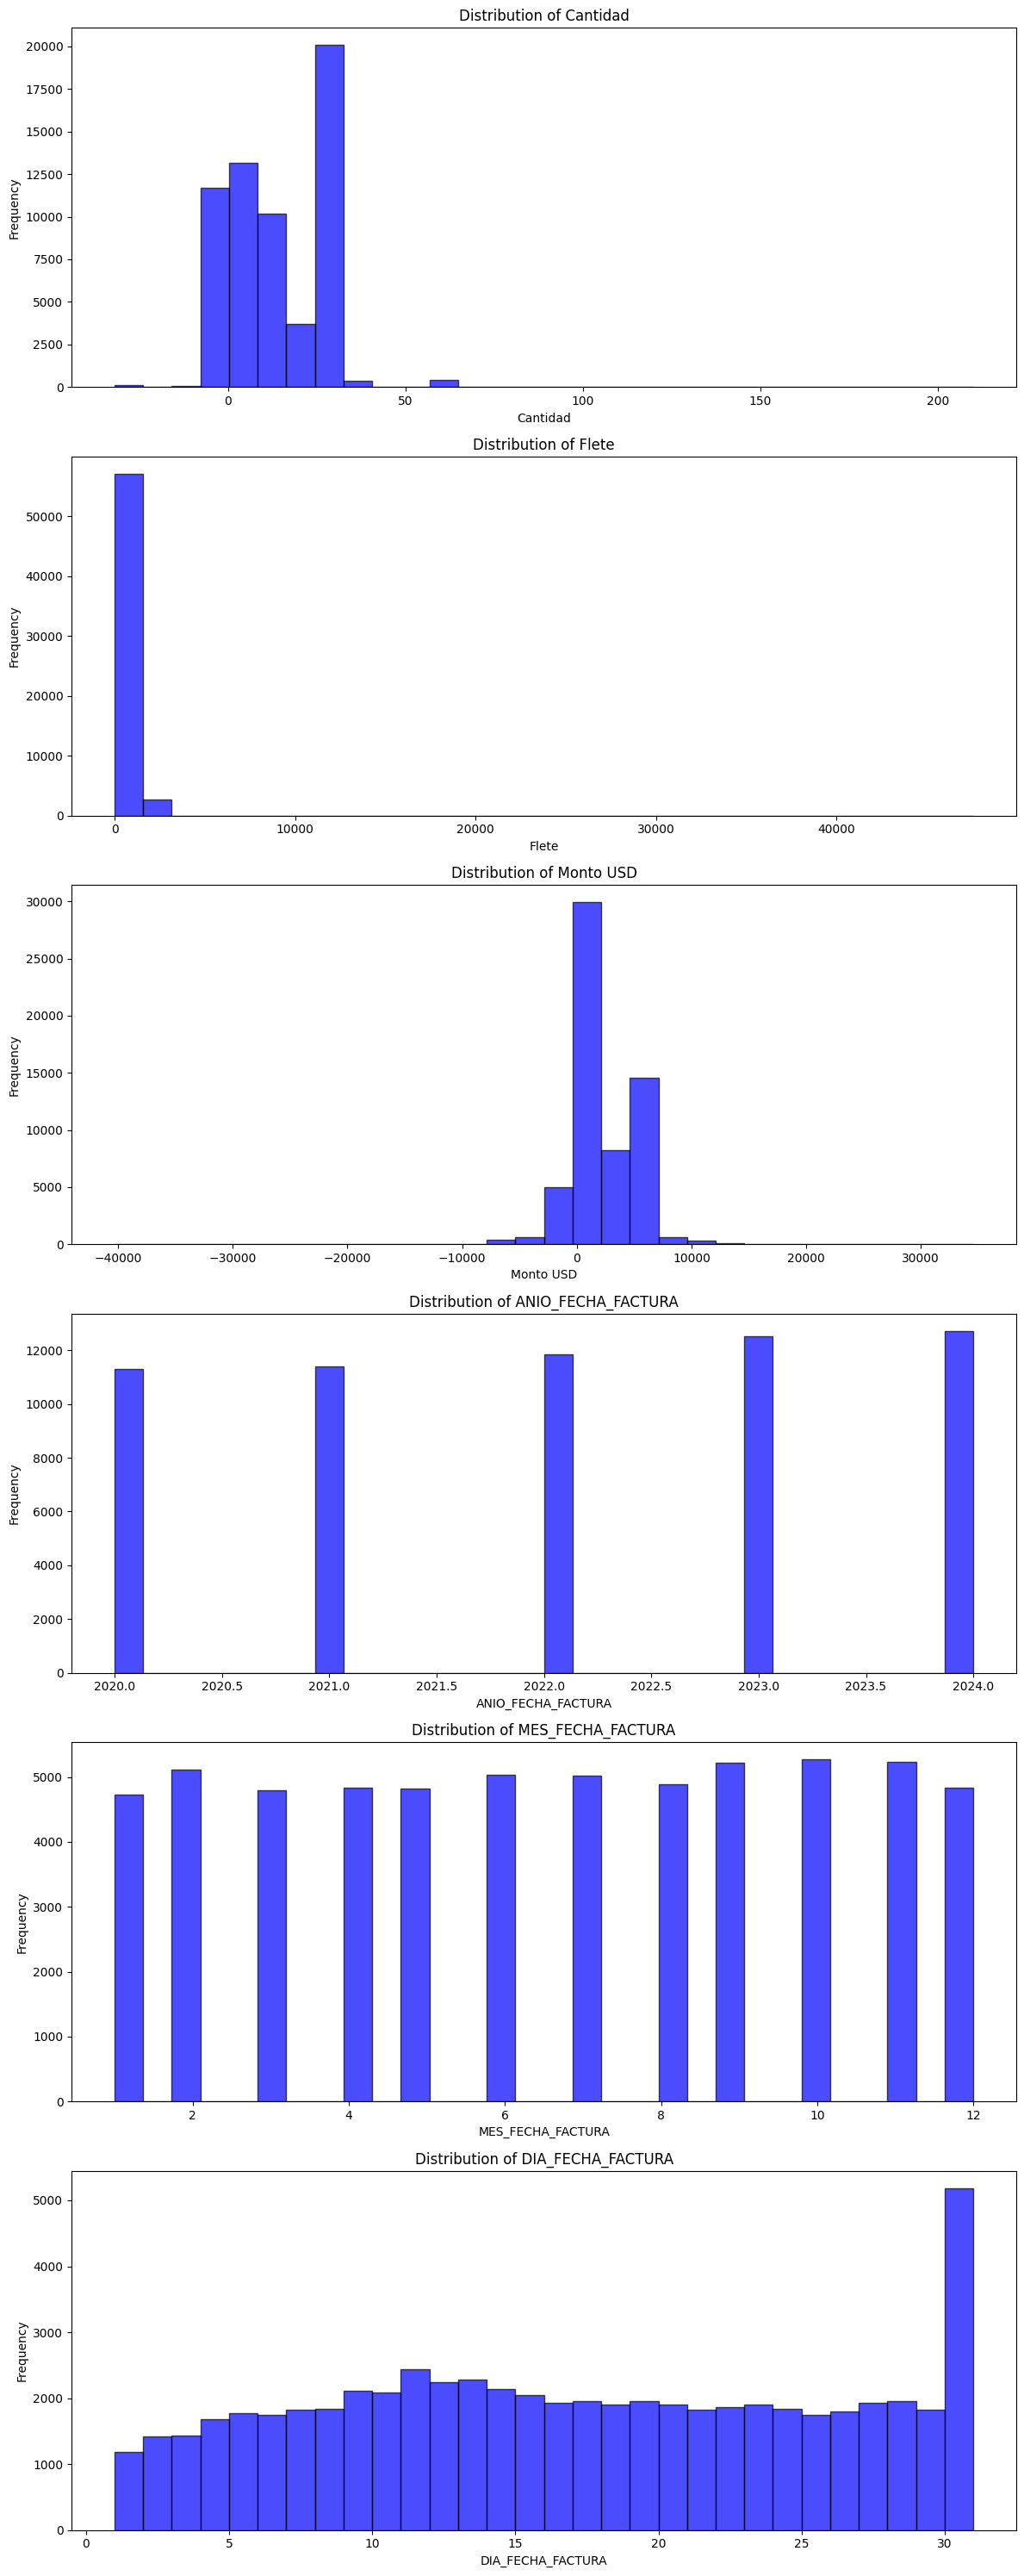

In [ ]:
fig, axes = plt.subplots(nrows=len(lista_cuantitativas), ncols=1, figsize=(12, 5*len(lista_cuantitativas)))

for ax, col in zip(axes, lista_cuantitativas):
    ax.hist(df_dataset[col], bins=30, color='blue', alpha=0.7, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- La variable FECHA_FACTURA muestra una distribución uniforme y creciente entre los años 2020 y 2025. Esto sugiere que el volumen de registros ha ido aumentando de manera progresiva, posiblemente debido a un crecimiento en las operaciones de la entidad.

- En el caso de la variable Cantidad, se observa que la mayoría de los valores se encuentran por debajo de las 50 unidades. Sin embargo, existen algunos casos atípicos que alcanzan hasta 200 unidades, lo cual indica una distribución sesgada y sugiere revisar transacciones de alto volumen.

- La variable Flete presenta una distribución altamente asimétrica, con la mayoría de registros en valores bajos y algunos valores extremos que superan los 40,000. Estos outliers podrían deberse a operaciones logísticas excepcionales o a errores en el ingreso de datos.

- Por su parte, Monto USD también presenta una fuerte asimetría, con colas largas hacia la derecha y valores negativos inusuales que llegan hasta -40,000. Esto podría indicar la presencia de devoluciones, notas de crédito o errores contables que requieren atención.

#### BoxPlot

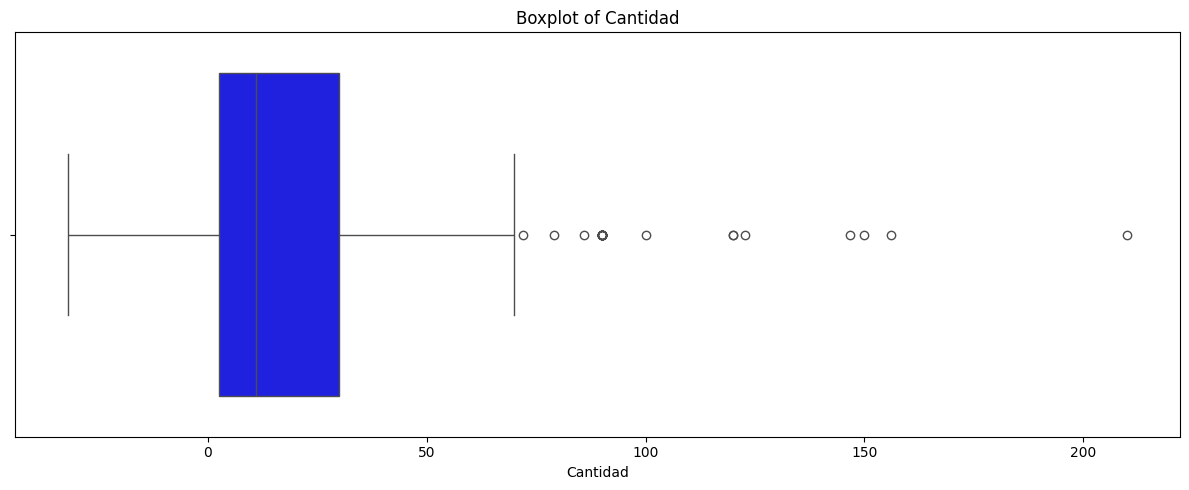

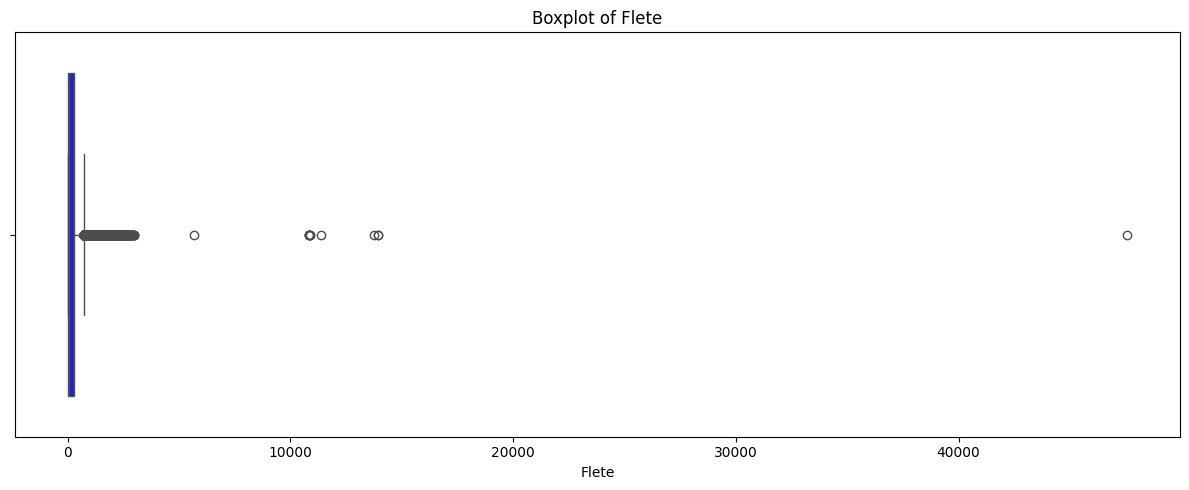

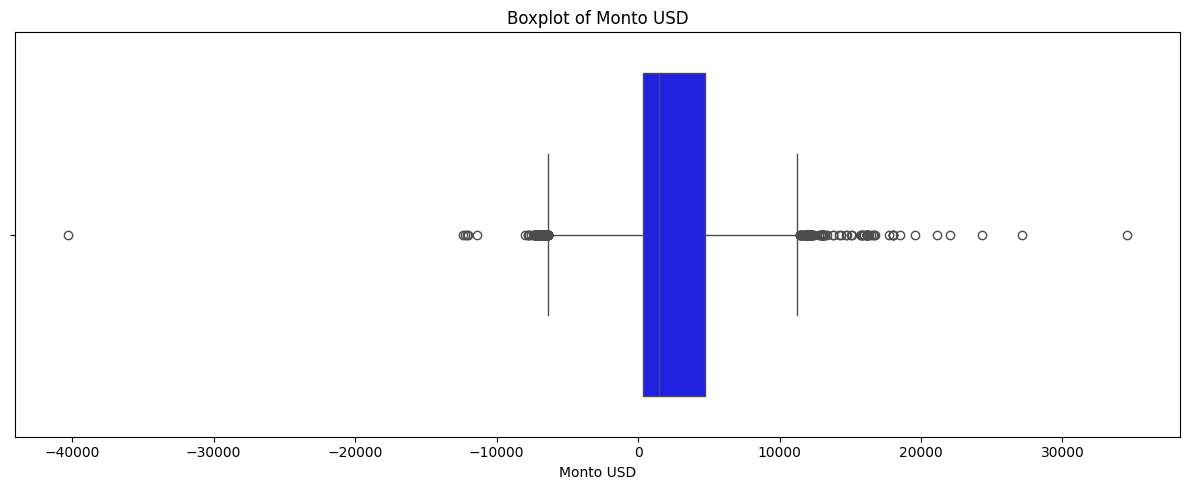

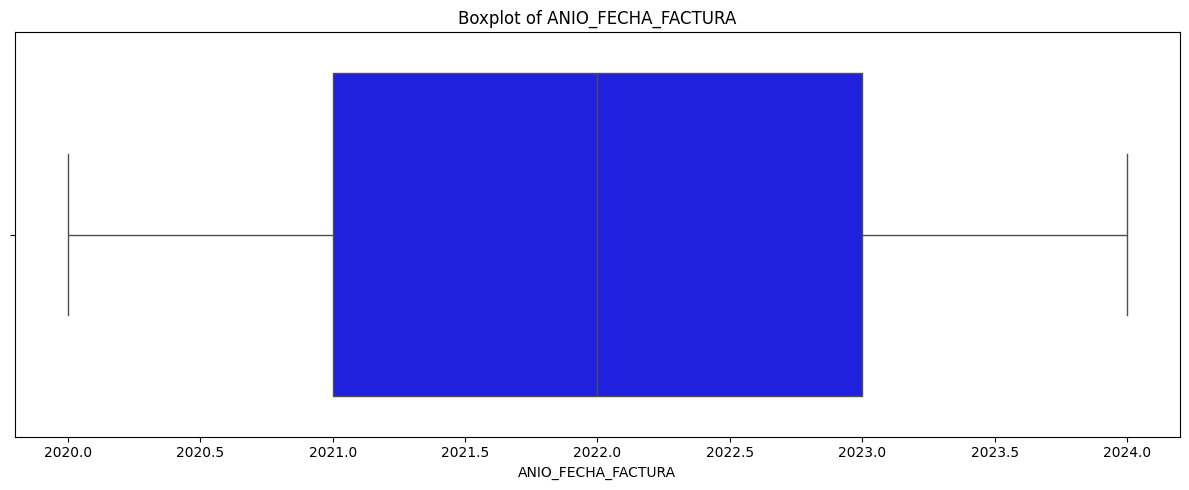

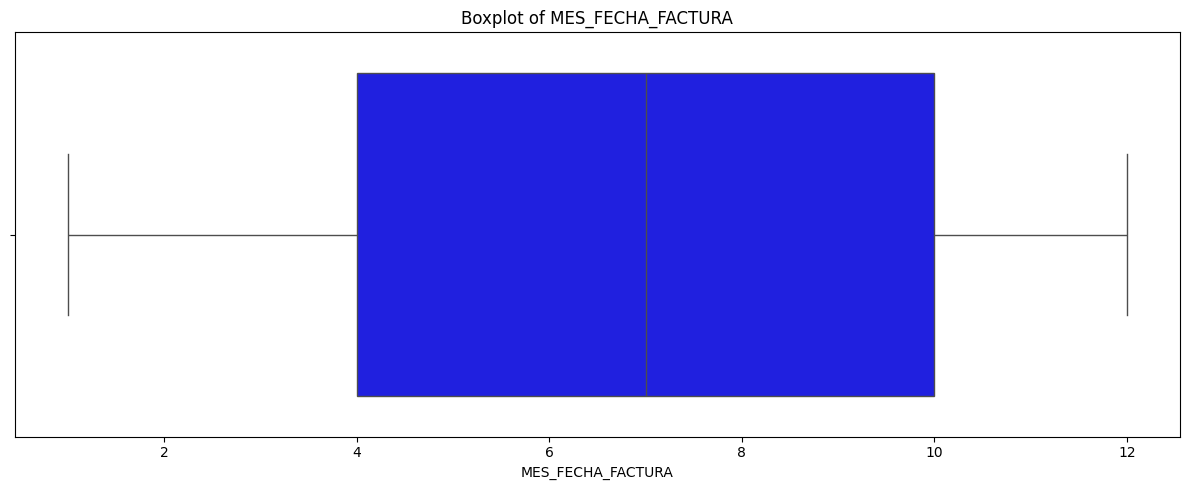

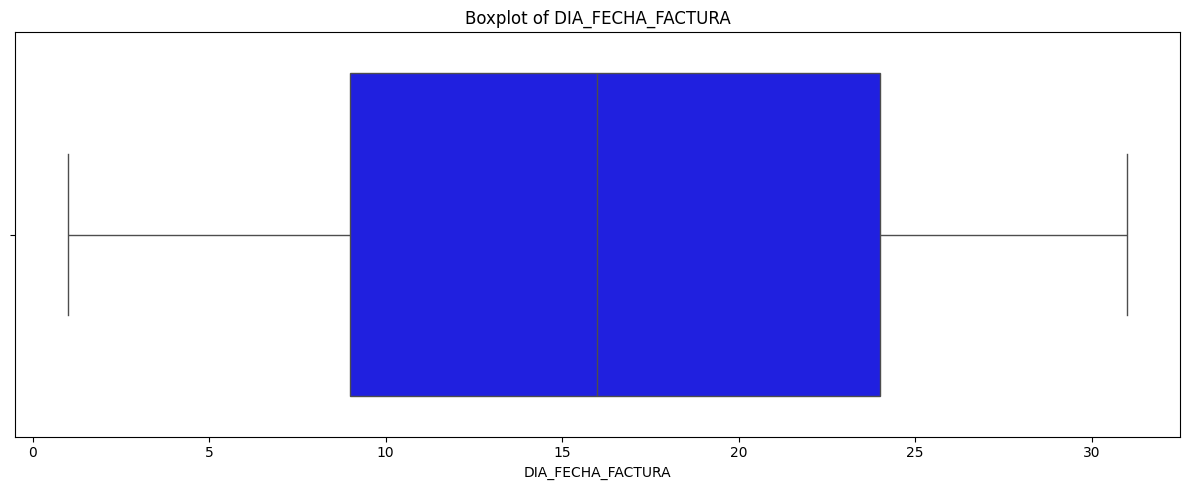

In [ ]:
for i in lista_cuantitativas:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df_dataset[i], color='blue')
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()

- La variable Cantidad presenta una dispersión moderada, con la mayoría de valores entre 0 y 50 unidades. Sin embargo, existen outliers por encima de 150 que podrían distorsionar los análisis.

- En Flete se concentra la mayoría de registros en valores bajos, aunque se identifican algunos casos atípicos superiores a 40,000. Esto podría deberse a errores o situaciones logísticas excepcionales.

- Monto USD muestra una amplia variabilidad, incluyendo valores negativos cercanos a -40,000 y máximos que superan los 30,000. Esto sugiere la existencia de devoluciones o inconsistencias contables.

- En general, la presencia de valores atípicos en todas las variables cuantitativas requiere una limpieza y posible transformación antes de aplicar modelos predictivos o analíticos.

#### Analizamos los valores negativos

* Monto negativo

In [ ]:
df_dataset[df_dataset["Monto USD"]<0]


COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE COD_MATERIAL COD_MARCA  \
83          10015    TRADICIONAL        BROKER           15         C   
84          10015    TRADICIONAL        BROKER           26         C   
94          10244    TRADICIONAL  DISTRIBUIDOR            5         C   
95          10244    TRADICIONAL  DISTRIBUIDOR            5         C   
96          10284    TRADICIONAL        BROKER           14         C   
...           ...            ...           ...          ...       ...   
60040       19324    TRADICIONAL  DISTRIBUIDOR           70         C   
60041       19324    TRADICIONAL  DISTRIBUIDOR           70         C   
60042       19350    TRADICIONAL  DISTRIBUIDOR           14         C   
60043       19350    TRADICIONAL  DISTRIBUIDOR           14         C   
60044       19425    TRADICIONAL        BROKER           14         C   

         REGION PROVINCIA              DISTRITO         CIUDAD  \
83         Lima      LIMA  SAN MARTIN DE PORRES   NORTE - TODO   
84         Lima      LIMA  SAN MARTIN DE PORRES   NORTE - TODO   
94     Arequipa  AREQUIPA              AREQUIPA       AREQUIPA   
95     Arequipa  AREQUIPA              AREQUIPA       AREQUIPA   
96         Lima      LIMA           LA VICTORIA  CENTRO - TODO   
...         ...       ...                   ...            ...   
60040  Arequipa  CAYLLOMA                 MAJES       PEDREGAL   
60041  Arequipa  CAYLLOMA                 MAJES       PEDREGAL   
60042       Ica   CHINCHA          CHINCHA ALTA        CHINCHA   
60043       Ica   CHINCHA          CHINCHA ALTA        CHINCHA   
60044      Lima      LIMA     VILLA EL SALVADOR     SUR - TODO   

      CENTRO_DESPACHO     CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad  \
83               PE23  Factura a 15 días  55017194            TO       0.0   
84               PE23  Factura a 15 días  55017135            TO       0.0   
94               PE22  Factura a 15 días  55017148            TO       0.0   
95               PE23  Factura a 15 días  55017169            TO       0.0   
96               PE23  Factura a 21 días  55017170            TO       0.0   
...               ...                ...       ...           ...       ...   
60040            PE23            Contado  55031584            TO       0.0   
60041            PE23            Contado  55031627            TO       0.0   
60042            PE23            Contado  55031585            TO       0.0   
60043            PE23            Contado  55031624            TO       0.0   
60044            PE23            Contado  55031586            TO       0.0   

       Flete  Monto USD  ANIO_FECHA_FACTURA  MES_FECHA_FACTURA  \
83       0.0   -3271.95                2020                  1   
84       0.0   -4259.57                2020                  1   
94       0.0   -3401.02                2020                  1   
95       0.0   -2613.81                2020                  1   
96       0.0    -145.21                2020                  1   
...      ...        ...                 ...                ...   
60040    0.0    -221.44                2024                 12   
60041    0.0    -773.83                2024                 12   
60042    0.0    -442.89                2024                 12   
60043    0.0    -554.08                2024                 12   
60044    0.0    -223.02                2024                 12   

       DIA_FECHA_FACTURA  
83                     8  
84                     8  
94                     8  
95                     8  
96                     8  
...                  ...  
60040                 31  
60041                 31  
60042                 31  
60043                 31  
60044                 31  

[10369 rows x 19 columns]

Se observa que, en los registros con montos negativos, la cantidad y el flete son 0. Se debe realizar un análisis más profundo.

In [ ]:
df_dataset[(df_dataset["Monto USD"]<0) & (df_dataset["Flete"]==0)& (df_dataset["Cantidad"]==0)]


COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE COD_MATERIAL COD_MARCA  \
83          10015    TRADICIONAL        BROKER           15         C   
84          10015    TRADICIONAL        BROKER           26         C   
94          10244    TRADICIONAL  DISTRIBUIDOR            5         C   
95          10244    TRADICIONAL  DISTRIBUIDOR            5         C   
96          10284    TRADICIONAL        BROKER           14         C   
...           ...            ...           ...          ...       ...   
60040       19324    TRADICIONAL  DISTRIBUIDOR           70         C   
60041       19324    TRADICIONAL  DISTRIBUIDOR           70         C   
60042       19350    TRADICIONAL  DISTRIBUIDOR           14         C   
60043       19350    TRADICIONAL  DISTRIBUIDOR           14         C   
60044       19425    TRADICIONAL        BROKER           14         C   

         REGION PROVINCIA              DISTRITO         CIUDAD  \
83         Lima      LIMA  SAN MARTIN DE PORRES   NORTE - TODO   
84         Lima      LIMA  SAN MARTIN DE PORRES   NORTE - TODO   
94     Arequipa  AREQUIPA              AREQUIPA       AREQUIPA   
95     Arequipa  AREQUIPA              AREQUIPA       AREQUIPA   
96         Lima      LIMA           LA VICTORIA  CENTRO - TODO   
...         ...       ...                   ...            ...   
60040  Arequipa  CAYLLOMA                 MAJES       PEDREGAL   
60041  Arequipa  CAYLLOMA                 MAJES       PEDREGAL   
60042       Ica   CHINCHA          CHINCHA ALTA        CHINCHA   
60043       Ica   CHINCHA          CHINCHA ALTA        CHINCHA   
60044      Lima      LIMA     VILLA EL SALVADOR     SUR - TODO   

      CENTRO_DESPACHO     CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad  \
83               PE23  Factura a 15 días  55017194            TO       0.0   
84               PE23  Factura a 15 días  55017135            TO       0.0   
94               PE22  Factura a 15 días  55017148            TO       0.0   
95               PE23  Factura a 15 días  55017169            TO       0.0   
96               PE23  Factura a 21 días  55017170            TO       0.0   
...               ...                ...       ...           ...       ...   
60040            PE23            Contado  55031584            TO       0.0   
60041            PE23            Contado  55031627            TO       0.0   
60042            PE23            Contado  55031585            TO       0.0   
60043            PE23            Contado  55031624            TO       0.0   
60044            PE23            Contado  55031586            TO       0.0   

       Flete  Monto USD  ANIO_FECHA_FACTURA  MES_FECHA_FACTURA  \
83       0.0   -3271.95                2020                  1   
84       0.0   -4259.57                2020                  1   
94       0.0   -3401.02                2020                  1   
95       0.0   -2613.81                2020                  1   
96       0.0    -145.21                2020                  1   
...      ...        ...                 ...                ...   
60040    0.0    -221.44                2024                 12   
60041    0.0    -773.83                2024                 12   
60042    0.0    -442.89                2024                 12   
60043    0.0    -554.08                2024                 12   
60044    0.0    -223.02                2024                 12   

       DIA_FECHA_FACTURA  
83                     8  
84                     8  
94                     8  
95                     8  
96                     8  
...                  ...  
60040                 31  
60041                 31  
60042                 31  
60043                 31  
60044                 31  

[9884 rows x 19 columns]

Observamos que los valores negativos en los registros están asociados a devoluciones de pedidos, lo que nos llevó a concluir que estos casos no aportarían información relevante para nuestro modelo. Por ello, decidimos eliminarlos del dataset.

In [ ]:
df_dataset=df_dataset[(df_dataset["Monto USD"]>=0) & (df_dataset["Flete"]!=0)& (df_dataset["Cantidad"]!=0)]


* Cantidad negativa

In [ ]:
df_dataset[df_dataset["Cantidad"]<0]


COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE COD_MATERIAL COD_MARCA REGION  \
48723       16093    TRADICIONAL  DISTRIBUIDOR           14         C   Lima   
48726       16093    TRADICIONAL  DISTRIBUIDOR            5         C   Lima   
48995       10322        MODERNO  DISTRIBUIDOR           24         C   Lima   

      PROVINCIA   DISTRITO         CIUDAD CENTRO_DESPACHO     CONDICION_PAGO  \
48723      LIMA      COMAS  LIMA - CENTRO            PE23  Factura a 30 días   
48726      LIMA      COMAS  LIMA - CENTRO            PE23  Factura a 30 días   
48995      LIMA  SURQUILLO           LIMA            PE22            Contado   

        FACTURA UNIDAD_MEDIDA  Cantidad  Flete  Monto USD  ANIO_FECHA_FACTURA  \
48723  55028259            TO    -0.025  15.54       9.27                2024   
48726  55028259            TO    -0.025  15.54       9.27                2024   
48995  55028282            TO    -0.025   9.03       3.32                2024   

       MES_FECHA_FACTURA  DIA_FECHA_FACTURA  
48723                  2                 13  
48726                  2                 13  
48995                  2                 21

Detectamos 3 registros con cantidad negativa. Al no existir soporte que lo justifique y por ser inconsistentes con las reglas de negocio, decidimos excluirlos para evitar sesgos en las métricas y en el modelo.

#### Analizamos los posibles outliers

* Variable monto

In [ ]:
df_dataset[df_dataset["Monto USD"]>=df_dataset["Monto USD"].quantile(0.999) ].head(10)


COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE COD_MATERIAL COD_MARCA  \
984         17414    TRADICIONAL  DISTRIBUIDOR           28         C   
1084        17414    TRADICIONAL  DISTRIBUIDOR           26         C   
1363        17414    TRADICIONAL  DISTRIBUIDOR           26         C   
4710        11470        EMPRESA        ESTADO           14         C   
6552        11470        EMPRESA        ESTADO           14         C   
6787        11470        EMPRESA        ESTADO           14         C   
6932        11470        EMPRESA        ESTADO           14         C   
7204        11470        EMPRESA        ESTADO           14         C   
7749        11470        EMPRESA        ESTADO           14         C   
12098       10006        EMPRESA      ALIMENTO            6         B   

        REGION         PROVINCIA     DISTRITO   CIUDAD CENTRO_DESPACHO  \
984    Ucayali  CORONEL PORTILLO     CALLERIA  HUÁNUCO            PE23   
1084   Ucayali  CORONEL PORTILLO     CALLERIA  HUÁNUCO            PE23   
1363   Ucayali  CORONEL PORTILLO     CALLERIA  HUÁNUCO            PE23   
4710      Lima              LIMA   SAN ISIDRO     LIMA            PE23   
6552      Lima              LIMA   SAN ISIDRO     LIMA            PE23   
6787      Lima              LIMA   SAN ISIDRO     LIMA            PE23   
6932      Lima              LIMA   SAN ISIDRO     LIMA            PE23   
7204      Lima              LIMA   SAN ISIDRO     LIMA            PE23   
7749      Lima              LIMA   SAN ISIDRO     LIMA            PE23   
12098     Lima              LIMA  LA VICTORIA     LIMA            PE22   

              CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad    Flete  \
984                  Contado  15143570            TO    150.00  2232.15   
1084                 Contado  15143695            TO    156.00  2318.65   
1363                 Contado  15143697            TO     62.40   920.36   
4710   Sin Condición de Pago  15146396            TO     66.00   834.73   
6552       Factura a 21 días  15147993            TO     90.00  1408.26   
6787       Factura a 21 días  15148454            TO     90.00  1395.15   
6932       Factura a 21 días  15148454            TO    120.00  1849.77   
7204       Factura a 21 días  15148454            TO     90.00  1384.23   
7749       Factura a 21 días  15149187            TO    146.75  2280.02   
12098      Factura a 45 días  15152858            TO     90.00   379.80   

       Monto USD  ANIO_FECHA_FACTURA  MES_FECHA_FACTURA  DIA_FECHA_FACTURA  
984     14214.30                2020                  1                 31  
1084    21135.56                2020                  2                  5  
1363    13330.97                2020                  2                 12  
4710    14677.01                2020                  5                 27  
6552    16770.97                2020                  7                 30  
6787    16614.99                2020                  8                  7  
6932    22029.15                2020                  8                 13  
7204    16484.91                2020                  8                 21  
7749    27152.88                2020                  9                  8  
12098   15099.30                2021                  1                 25

* Variable flete

In [ ]:
df_dataset[df_dataset["Flete"]>=df_dataset["Flete"].quantile(0.999) ].head(10)


COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE COD_MATERIAL COD_MARCA REGION  \
252        16600    TRADICIONAL  DISTRIBUIDOR           26         C  Tacna   
469        16600    TRADICIONAL  DISTRIBUIDOR           25         C  Tacna   
503        16600    TRADICIONAL  DISTRIBUIDOR           25         C  Tacna   
504        16600    TRADICIONAL  DISTRIBUIDOR           25         C  Tacna   
534        16600    TRADICIONAL  DISTRIBUIDOR           25         C  Tacna   
619        15535    TRADICIONAL  DISTRIBUIDOR           26         C  Cuzco   
1826       16600    TRADICIONAL  DISTRIBUIDOR           26         C  Tacna   
2210       16600    TRADICIONAL  DISTRIBUIDOR           26         C  Tacna   
2765       16600    TRADICIONAL  DISTRIBUIDOR           25         C  Tacna   
4396       16600    TRADICIONAL  DISTRIBUIDOR            5         C  Tacna   

     PROVINCIA DISTRITO CIUDAD CENTRO_DESPACHO     CONDICION_PAGO   FACTURA  \
252      TACNA    TACNA    ILO            PE22  Factura a 15 días  15142976   
469      TACNA    TACNA    ILO            PE23  Factura a 15 días  15143154   
503      TACNA    TACNA    ILO            PE23  Factura a 15 días  15143132   
504      TACNA    TACNA    ILO            PE23  Factura a 15 días  15143156   
534      TACNA    TACNA    ILO            PE23  Factura a 15 días  15143155   
619      CUSCO  WANCHAQ  CUSCO            PE22   Factura a 7 días  15143302   
1826     TACNA    TACNA    ILO            PE23  Factura a 15 días  15144367   
2210     TACNA    TACNA    ILO            PE23  Factura a 15 días  15144369   
2765     TACNA    TACNA    ILO            PE23  Factura a 15 días  15144745   
4396     TACNA    TACNA    ILO            PE23  Factura a 15 días  15146162   

     UNIDAD_MEDIDA  Cantidad    Flete  Monto USD  ANIO_FECHA_FACTURA  \
252             TO    31.200  2636.73    4636.98                2020   
469             TO    31.200  2694.53    4566.07                2020   
503             TO    31.200  2861.10    4401.68                2020   
504             TO    31.200  2695.34    4567.44                2020   
534             TO    30.576  2643.02    4478.79                2020   
619             TO    31.200  2706.51    4569.39                2020   
1826            TO    29.640  2654.98    4084.58                2020   
2210            TO    30.680  2711.50    4171.55                2020   
2765            TO    30.758  2657.56    4088.56                2020   
4396            TO    30.000  2662.21    4366.01                2020   

      MES_FECHA_FACTURA  DIA_FECHA_FACTURA  
252                   1                 10  
469                   1                 16  
503                   1                 17  
504                   1                 17  
534                   1                 18  
619                   1                 22  
1826                  2                 26  
2210                  2                 29  
2765                  3                 14  
4396                  5                 14

* Variable Cantidad

In [ ]:
df_dataset[df_dataset["Cantidad"]>=df_dataset["Cantidad"].quantile(0.999) ].head(10)


COD_CLIENTE SECTOR_CLIENTE RUBRO_CLIENTE COD_MATERIAL COD_MARCA   REGION  \
519        10322        MODERNO  DISTRIBUIDOR           14         C     Lima   
638        10322        MODERNO  DISTRIBUIDOR            5         C     Lima   
749        10006        EMPRESA      ALIMENTO            6         B     Lima   
791        10322        MODERNO  DISTRIBUIDOR            5         C     Lima   
883        10322        MODERNO  DISTRIBUIDOR           14         C     Lima   
984        17414    TRADICIONAL  DISTRIBUIDOR           28         C  Ucayali   
985        17414    TRADICIONAL  DISTRIBUIDOR           37         C  Ucayali   
1025       10006        EMPRESA      ALIMENTO            6         B     Lima   
1084       17414    TRADICIONAL  DISTRIBUIDOR           26         C  Ucayali   
1152       17414    TRADICIONAL  DISTRIBUIDOR           37         C  Ucayali   

             PROVINCIA     DISTRITO   CIUDAD CENTRO_DESPACHO  \
519               LIMA    SURQUILLO     LIMA            PE23   
638               LIMA    SURQUILLO     LIMA            PE23   
749               LIMA  LA VICTORIA     LIMA            PE22   
791               LIMA    SURQUILLO     LIMA            PE22   
883               LIMA    SURQUILLO     LIMA            PE23   
984   CORONEL PORTILLO     CALLERIA  HUÁNUCO            PE23   
985   CORONEL PORTILLO     CALLERIA  HUÁNUCO            PE23   
1025              LIMA  LA VICTORIA     LIMA            PE22   
1084  CORONEL PORTILLO     CALLERIA  HUÁNUCO            PE23   
1152  CORONEL PORTILLO     CALLERIA  HUÁNUCO            PE23   

         CONDICION_PAGO   FACTURA UNIDAD_MEDIDA  Cantidad    Flete  Monto USD  \
519             Contado  15143225            TO      60.0   902.52   11812.28   
638             Contado  15143343            TO      60.0   904.44   11837.20   
749   Factura a 45 días  15142797            TO      60.0   277.80   10041.60   
791   Factura a 30 días  15143478            TO      60.0   628.94   12028.74   
883             Contado  15143551            TO      60.0   896.86   11738.12   
984             Contado  15143570            TO     150.0  2232.15   14214.30   
985             Contado  15143571            TO      90.0  1339.28    8528.57   
1025  Factura a 45 días  15143487            TO      60.0   273.60   10045.80   
1084            Contado  15143695            TO     156.0  2318.65   21135.56   
1152            Contado  15143694            TO      90.0  1334.92    8500.74   

      ANIO_FECHA_FACTURA  MES_FECHA_FACTURA  DIA_FECHA_FACTURA  
519                 2020                  1                 18  
638                 2020                  1                 23  
749                 2020                  1                 27  
791                 2020                  1                 28  
883                 2020                  1                 30  
984                 2020                  1                 31  
985                 2020                  1                 31  
1025                2020                  2                  4  
1084                2020                  2                  5  
1152                2020                  2                  7

Observamos que se trata de valores reales, por lo que no corresponde eliminarlos. Sin embargo, consideramos necesario ajustarlos mediante una transformación, en este caso utilizando la función logarítmica.

In [ ]:
df_dataset['MontoUSD_Log'] = np.log1p(df_dataset['Monto USD'])
df_dataset['Flete_Log'] = np.log1p(df_dataset['Flete'])
df_dataset['Cantidad_Log'] = np.log1p(df_dataset['Cantidad'])

In [ ]:
lista_log_cuantitativo=["MontoUSD_Log","Flete_Log","Cantidad_Log"]


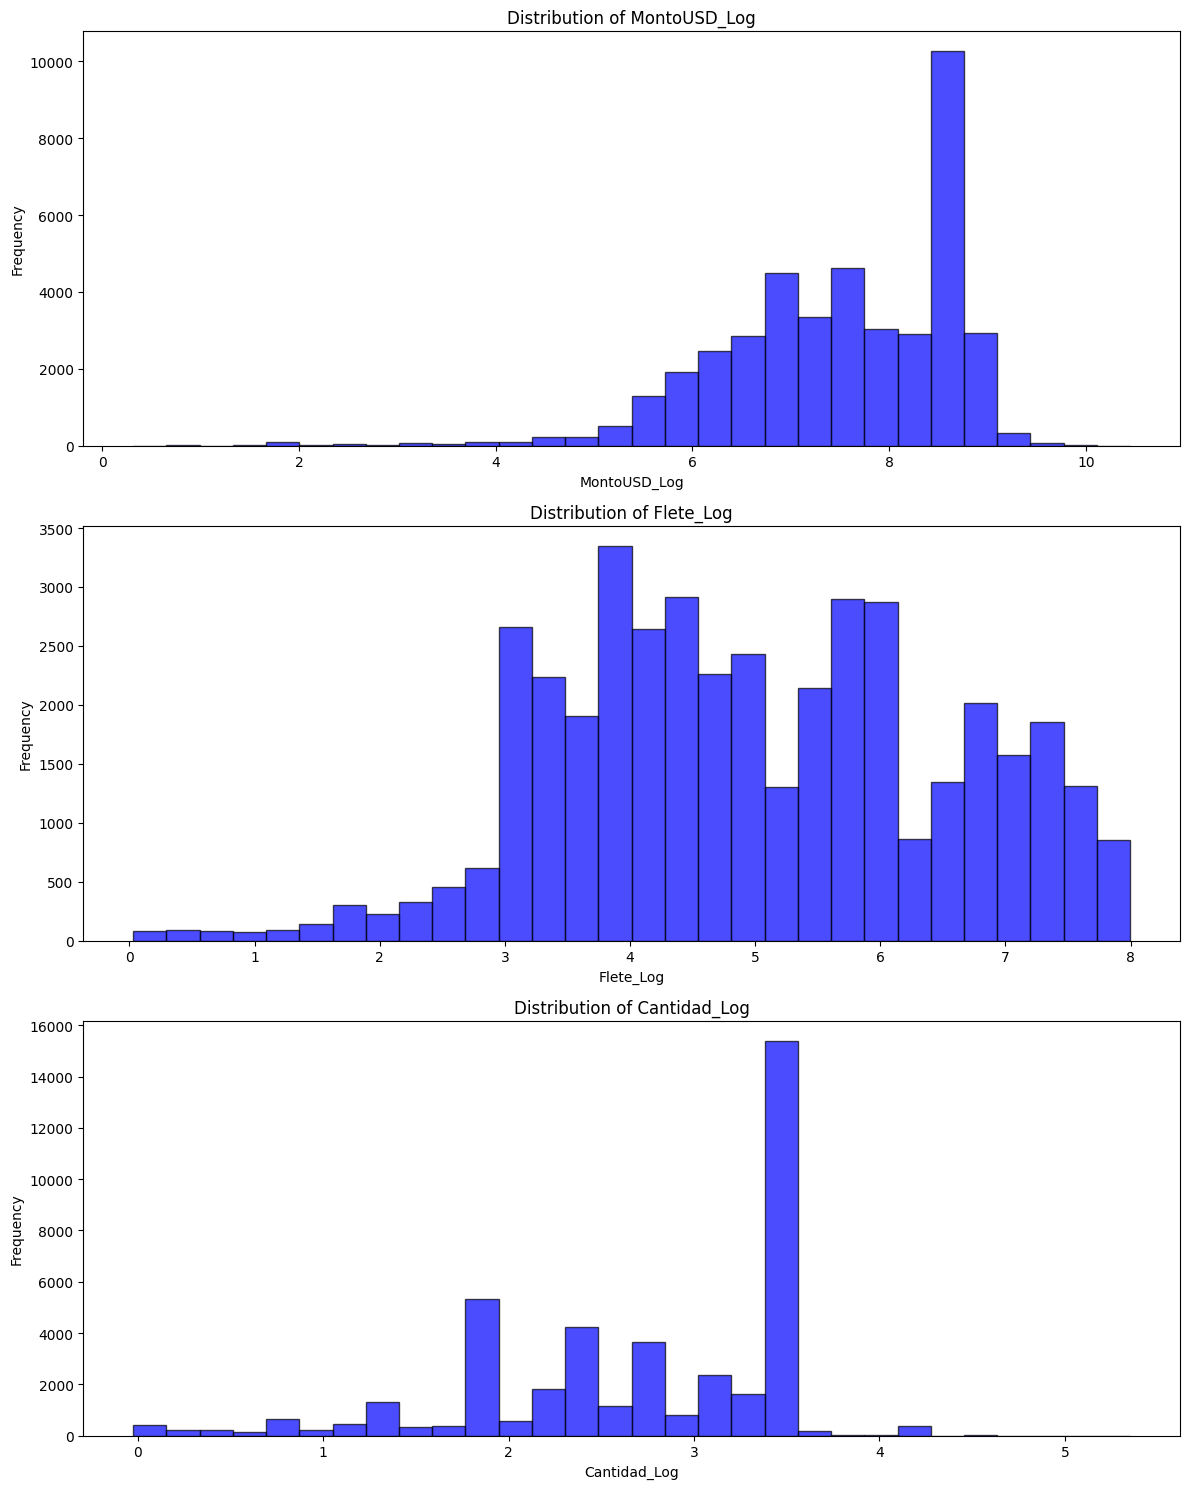

In [ ]:
fig, axes = plt.subplots(nrows=len(lista_log_cuantitativo), ncols=1, figsize=(12, 5*len(lista_log_cuantitativo)))

for ax, col in zip(axes, lista_log_cuantitativo):
    ax.hist(df_dataset[col], bins=30, color='blue', alpha=0.7, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Luego de la gráfica, confirmamos que la transformación logarítmica permitió controlar el impacto de los valores atípicos, mejorando la visualización de la distribución.

### Analisis univariado (Variables Cualitativas)


In [ ]:
lista_cualitativas

['COD_CLIENTE',
 'SECTOR_CLIENTE',
 'RUBRO_CLIENTE',
 'COD_MATERIAL',
 'COD_MARCA',
 'REGION',
 'PROVINCIA',
 'DISTRITO',
 'CIUDAD',
 'CENTRO_DESPACHO',
 'CONDICION_PAGO',
 'FACTURA',
 'UNIDAD_MEDIDA']

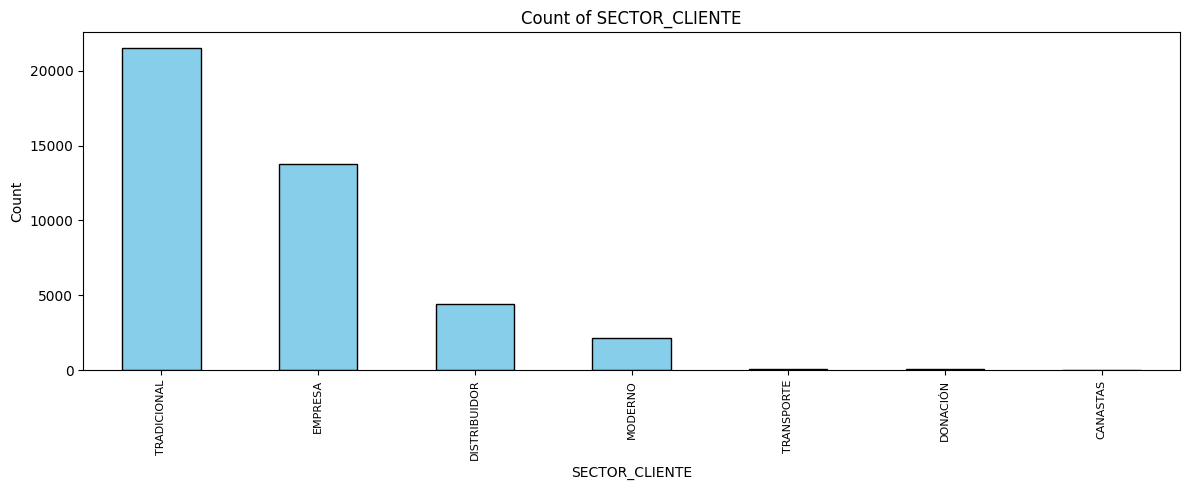

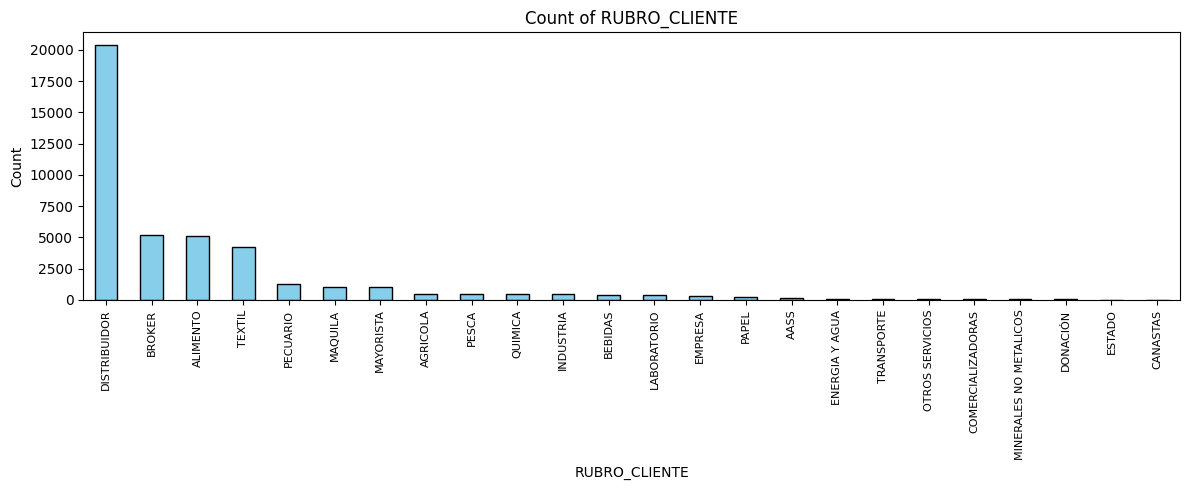

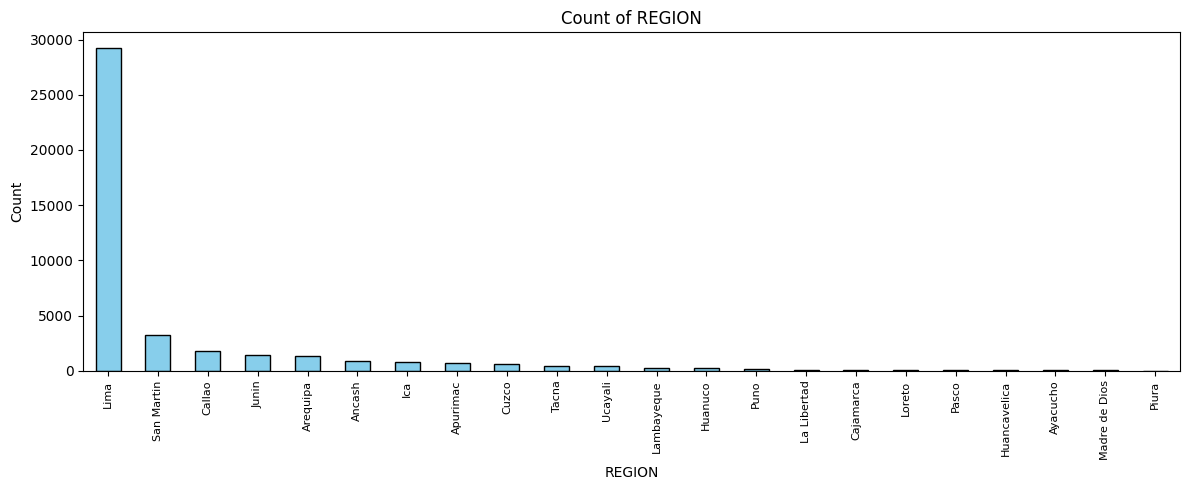

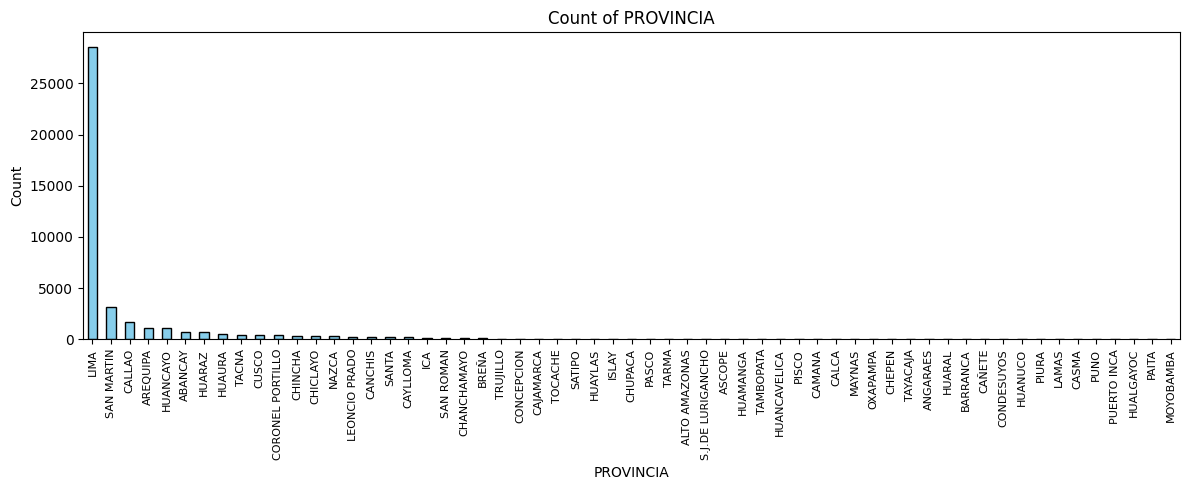

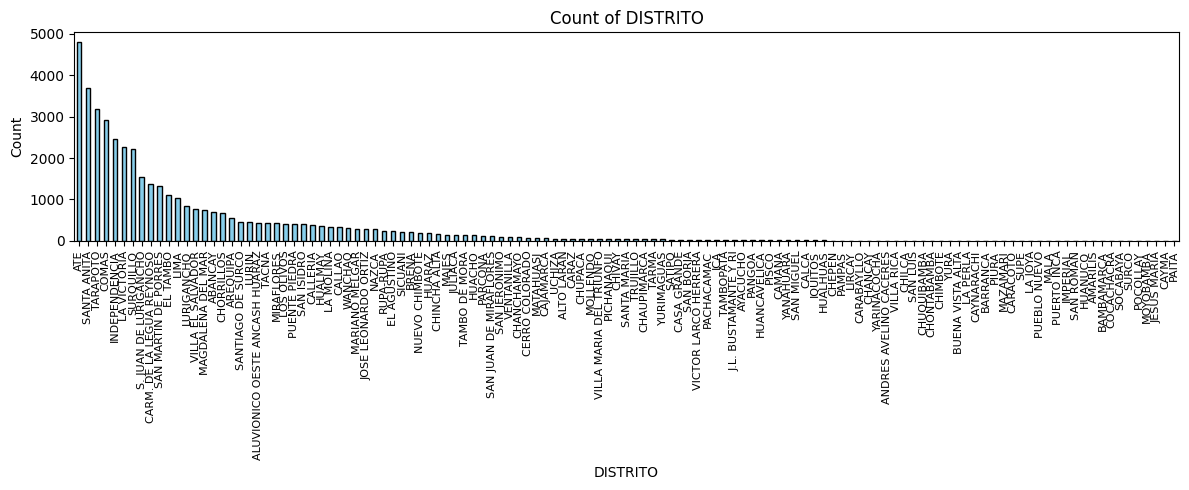

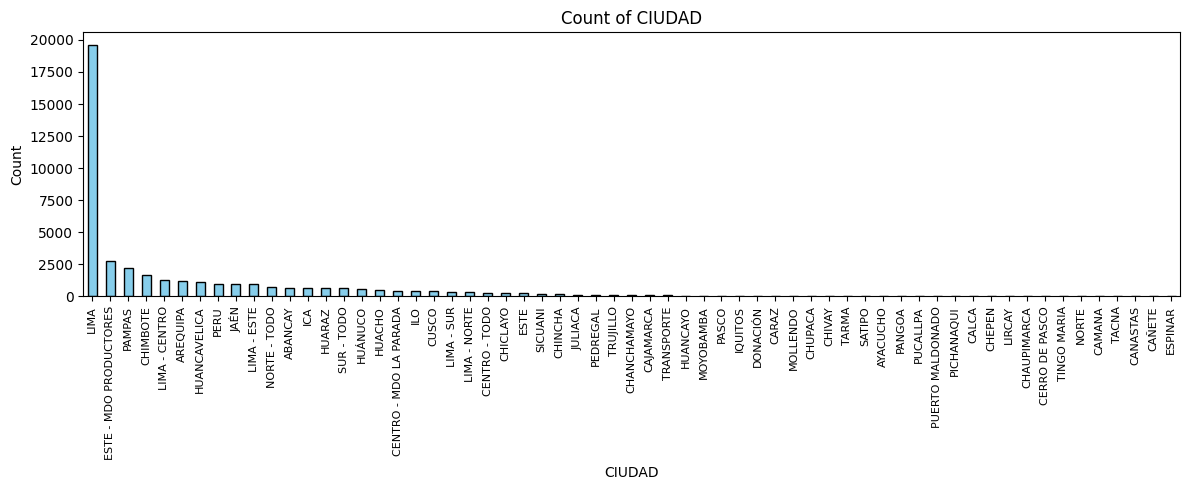

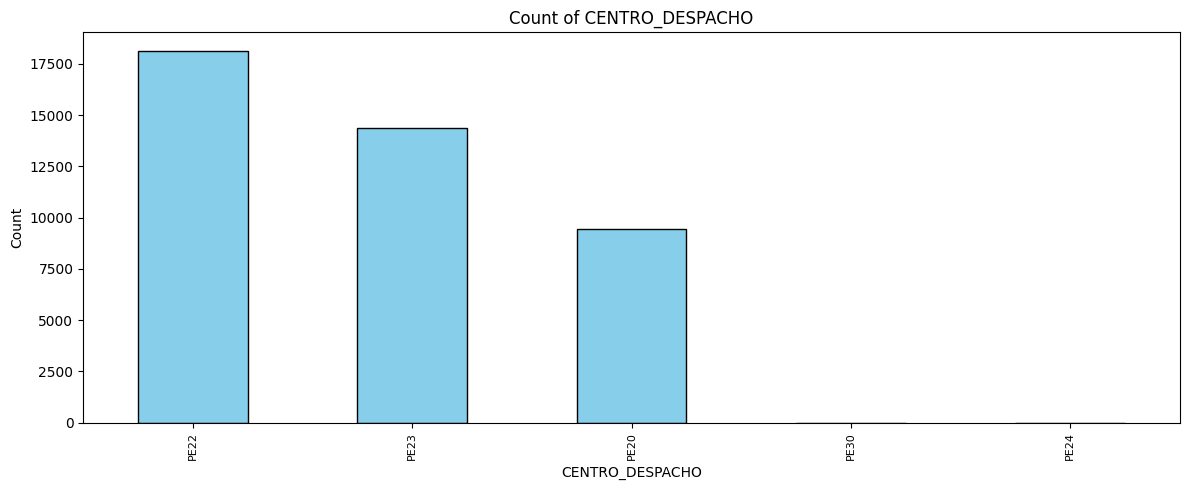

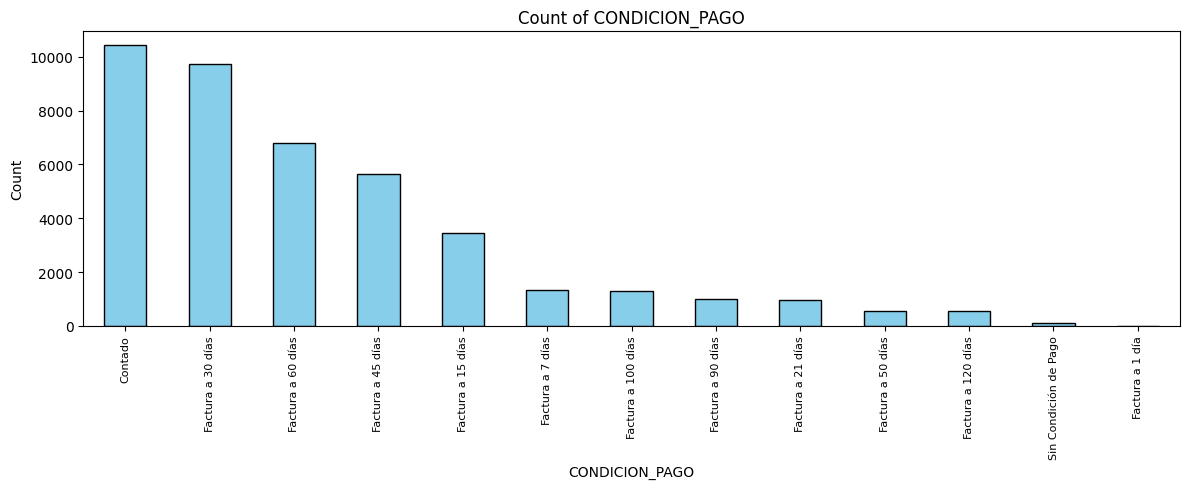

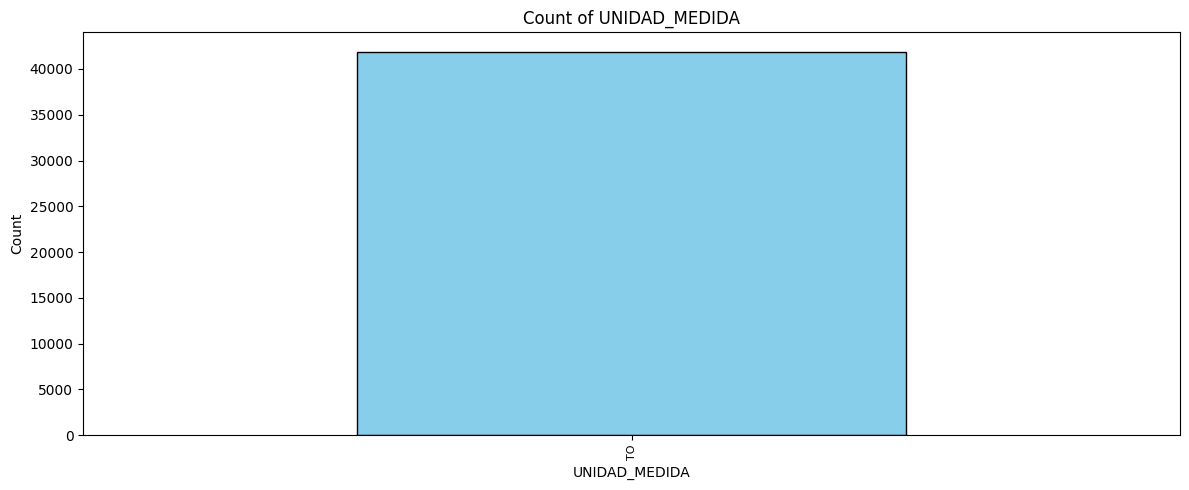

In [ ]:
for i in lista_cualitativas:
    if i.startswith("COD_") or i == "FACTURA": # filtrando dinámicamente las columnas que parecen identificadores
        continue
    plt.figure(figsize=(12, 5))
    df_dataset[i].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xticks(rotation=90, fontsize=8)
    plt.title(f'Count of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


Observamos que la variable UNIDAD_MEDIDA presenta una única categoría y que, en otras variables, existen varias categorías con baja frecuencia que podrían generar ruido. Por ello, optaremos por agrupar estas últimas en una categoría denominada “Otros”.

In [ ]:
df_dataset["RUBRO_CLIENTE"]= df_dataset["RUBRO_CLIENTE"].apply(lambda x: "Otros" if x not in ["DISTRIBUIDOR","TEXTIL","ALIMENTO","BROKER"] else x  )
df_dataset["COD_MARCA"]= df_dataset["COD_MARCA"].apply(lambda x: "Otros" if x in ["D","A"] else x  )
df_dataset["CENTRO_DESPACHO"]= df_dataset["CENTRO_DESPACHO"].apply(lambda x: "Otros" if x  in ["PE30","PE24"] else x  )
df_dataset["CONDICION_PAGO"]= df_dataset["CONDICION_PAGO"].apply(lambda x: "Otros" if x  in ["Sin Condición de Pago","Factura a 1 día","Factura a 100 días","Factura a 90 días","Factura a 50 días","Factura a 7 días","Factura a 21 días"] else x  )
df_dataset["REGION"]= df_dataset["REGION"].apply(lambda x: "Otros" if x  not in ["Lima"] else x  )
df_dataset = df_dataset.drop(columns=['UNIDAD_MEDIDA'])
df_dataset = df_dataset.drop(columns=['FACTURA'])


In [ ]:
lista_cualitativas = list(df_dataset.describe(include='object').columns)
lista_cuantitativas = list(df_dataset.describe().columns)
target="MontoUSD_Log"


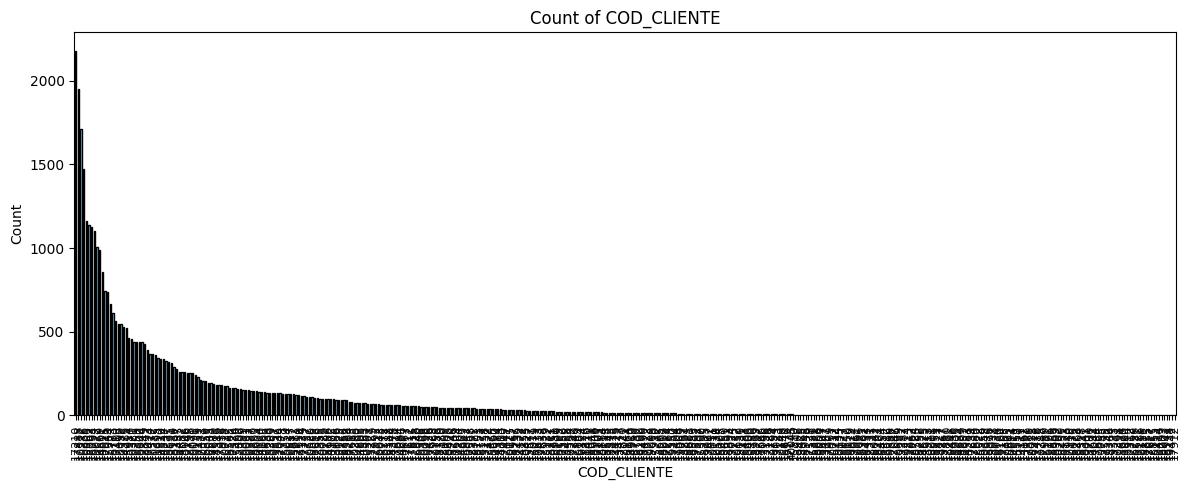

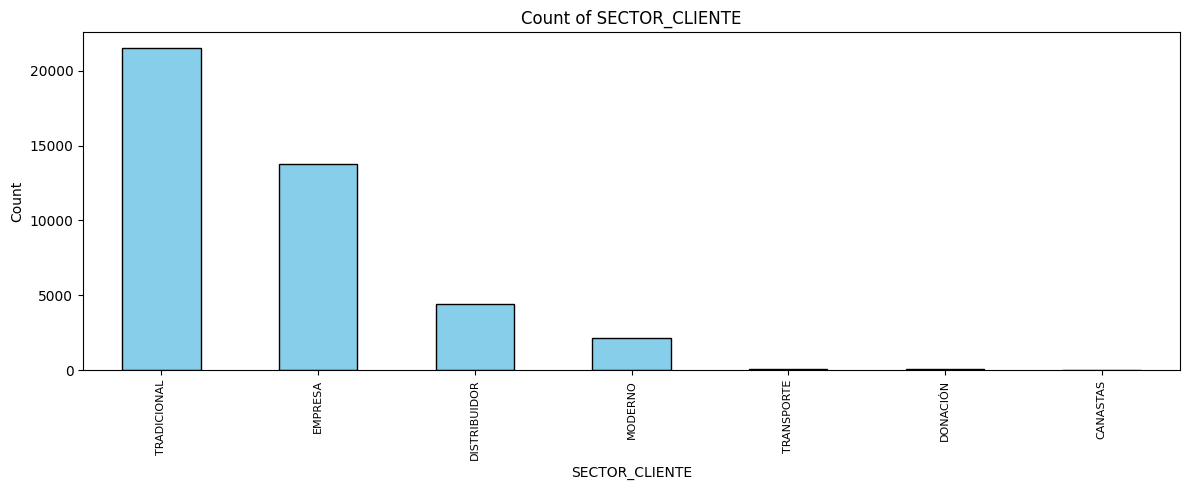

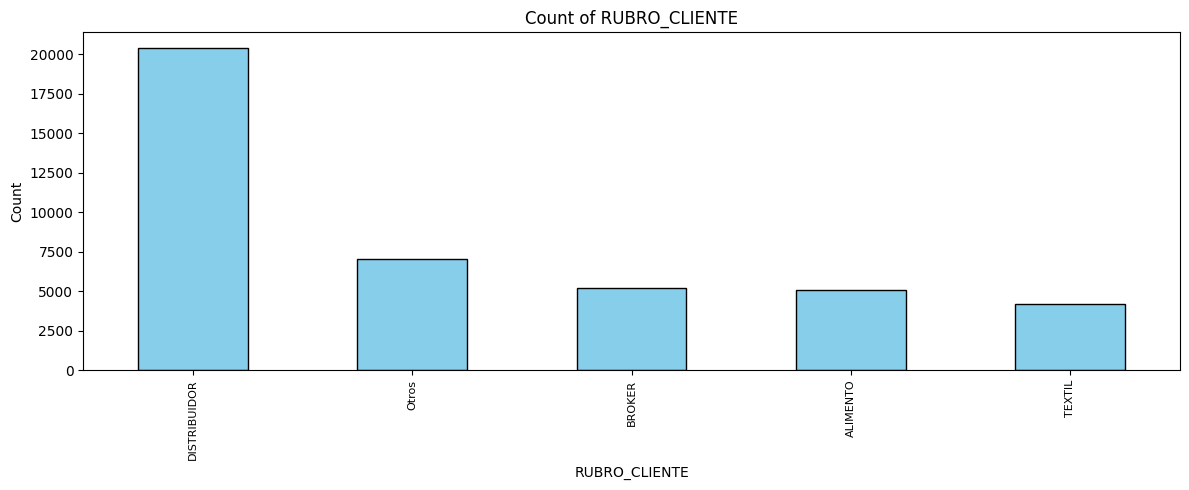

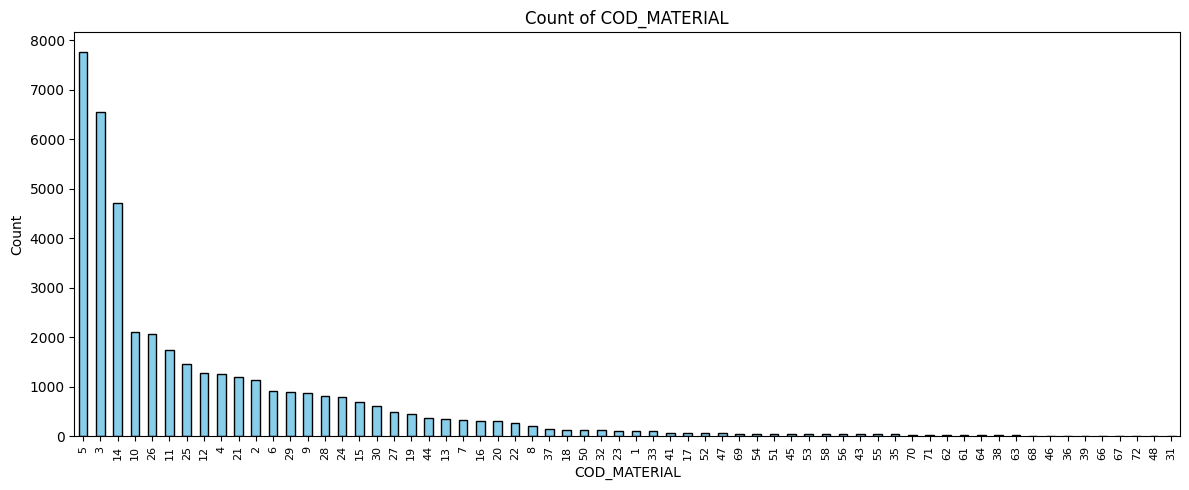

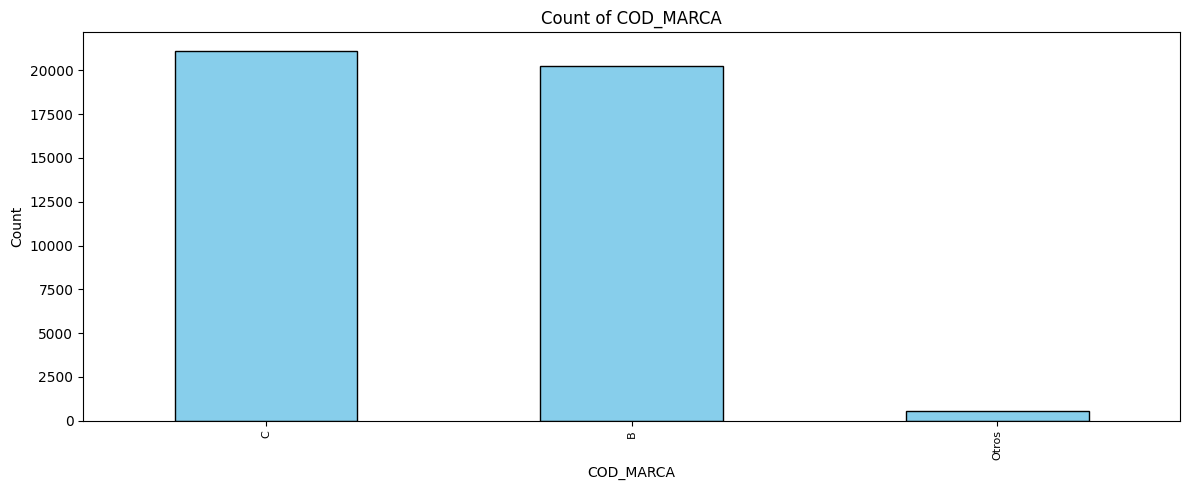

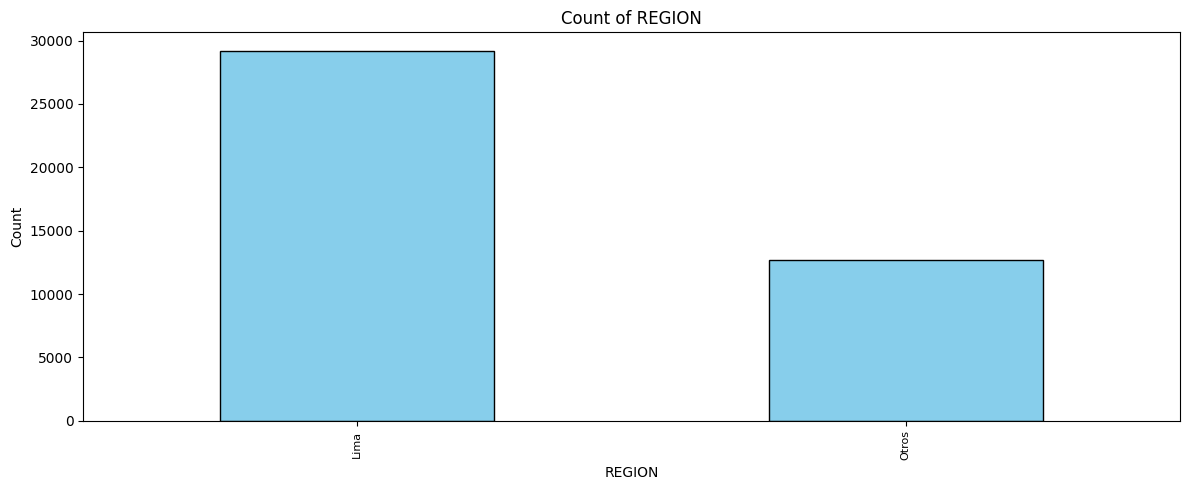

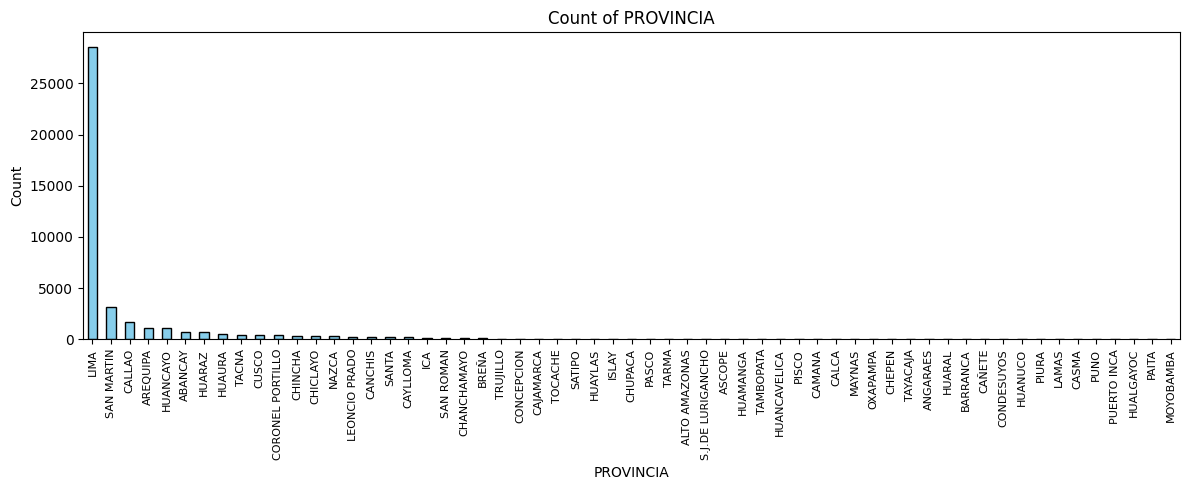

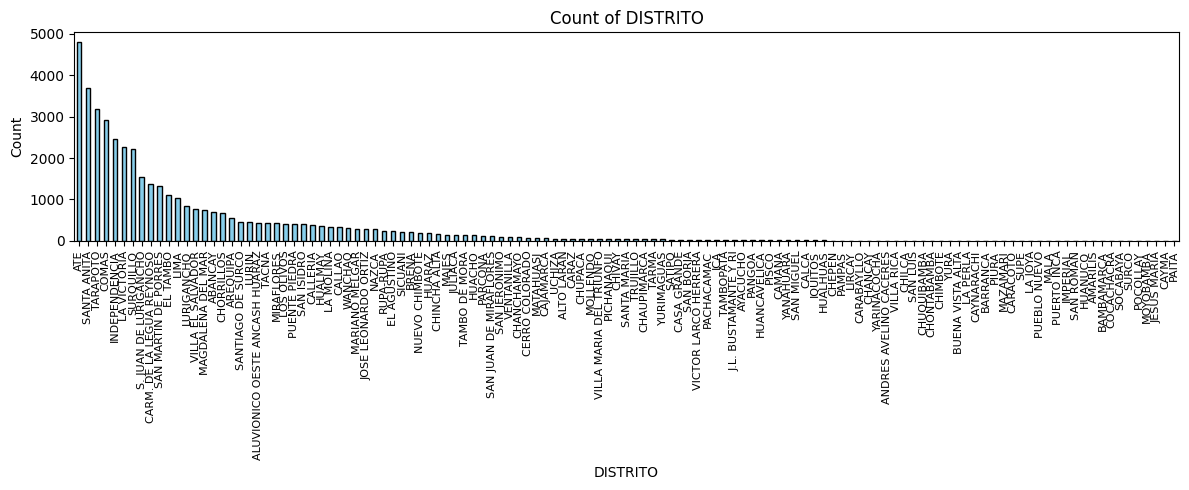

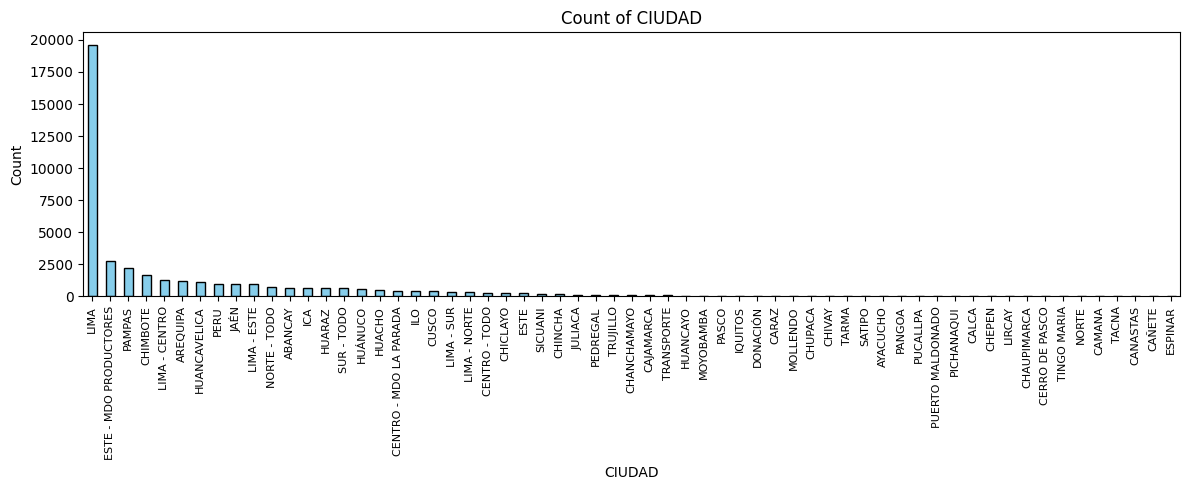

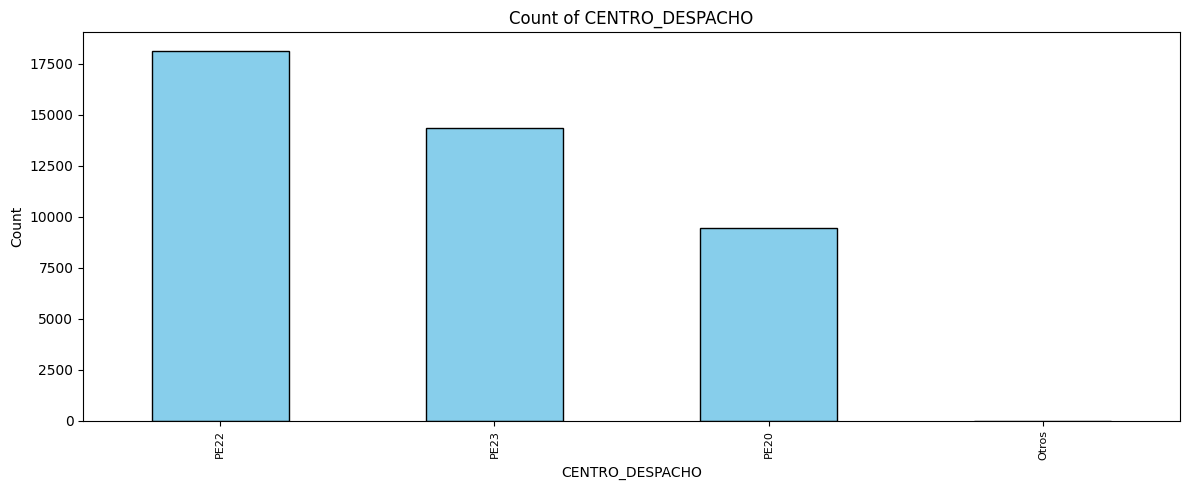

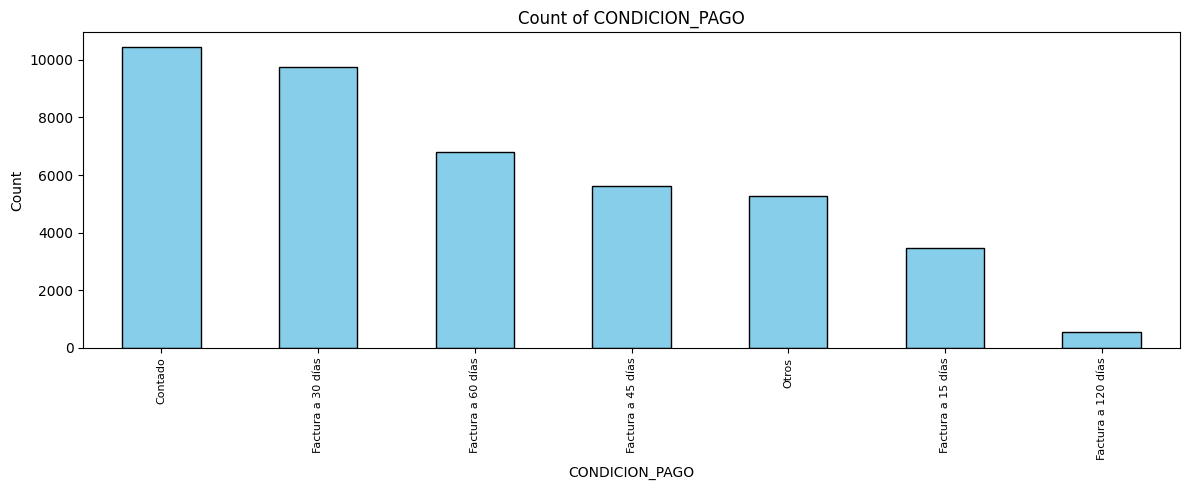

In [ ]:
for i in lista_cualitativas:

    plt.figure(figsize=(12, 5))
    df_dataset[i].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xticks(rotation=90, fontsize=8)
    plt.title(f'Count of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

### Relación de variables cuantitativas con variables categóricas


Ahora veremos si las categorias de cada variable, son diferenciables en el target a traves de un boxplot



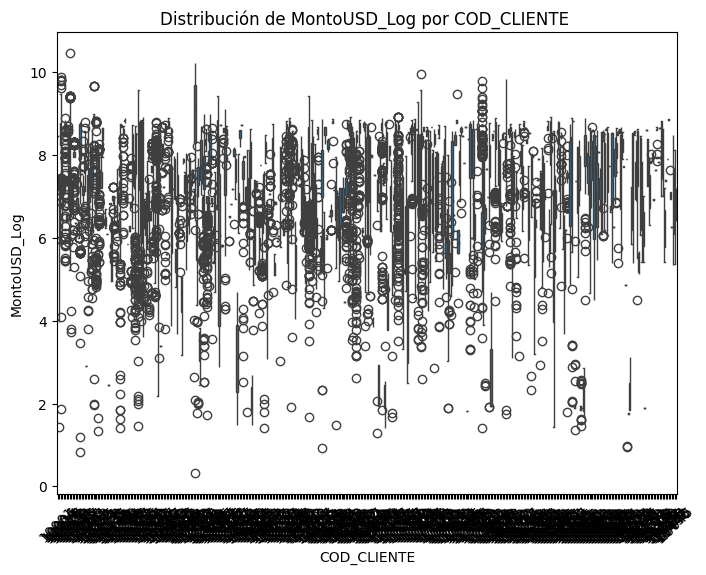

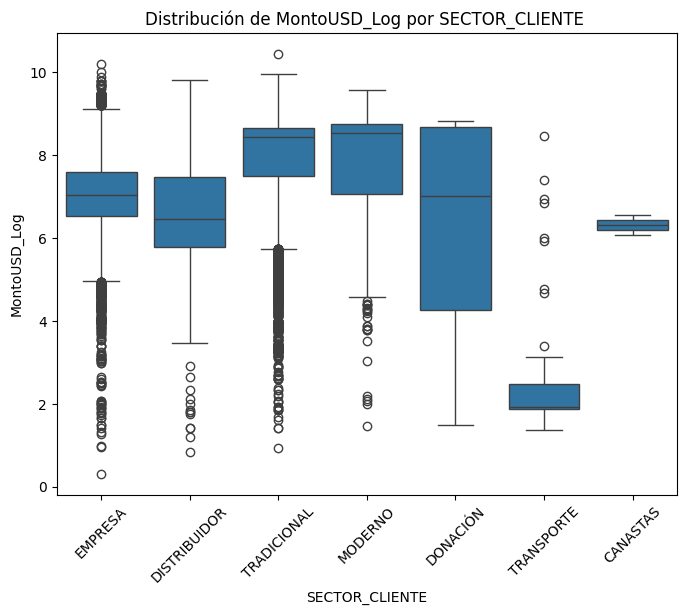

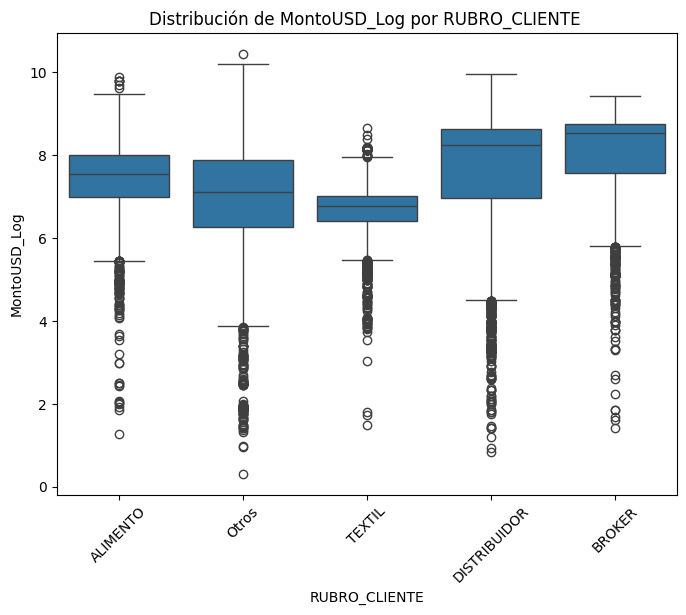

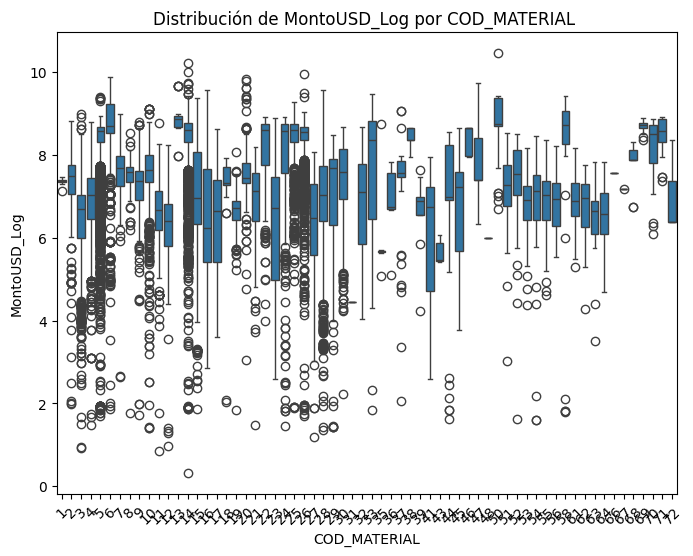

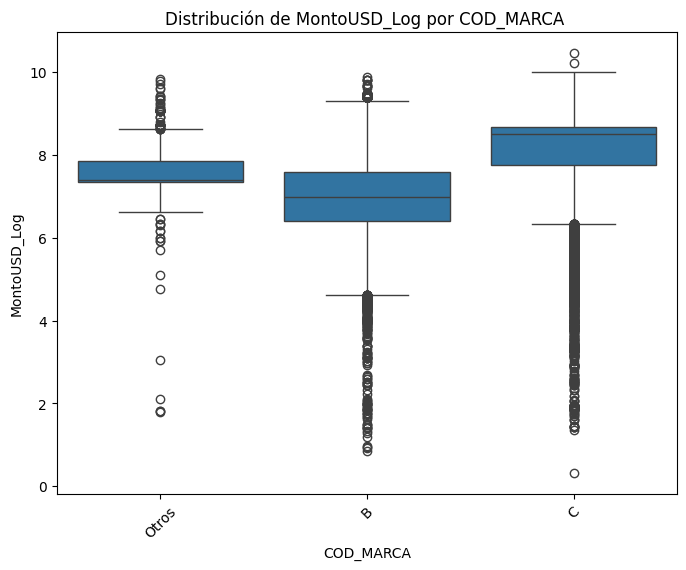

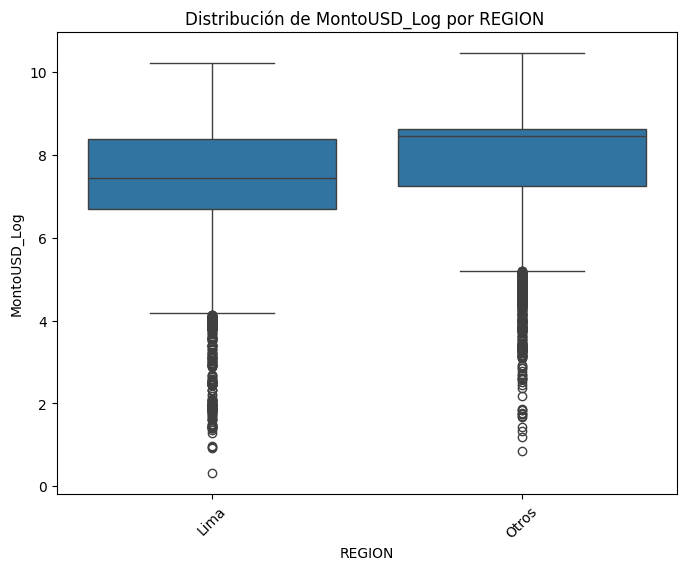

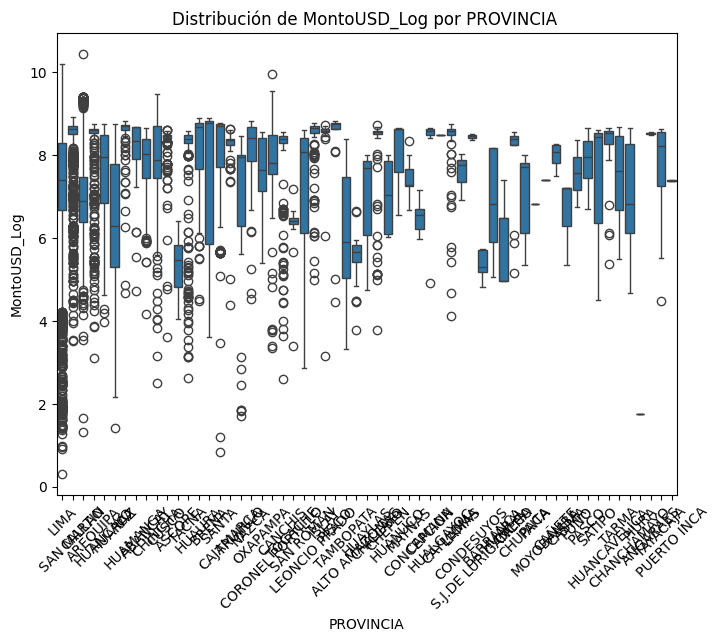

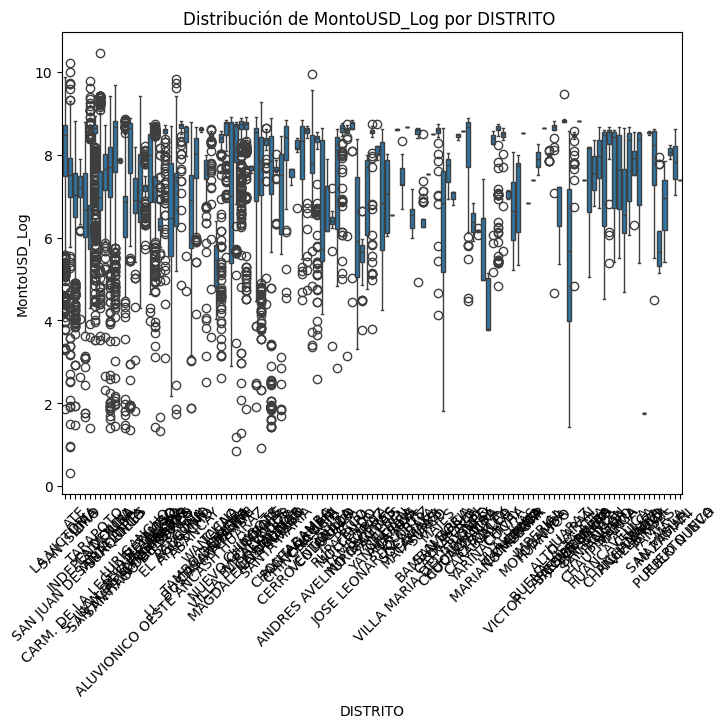

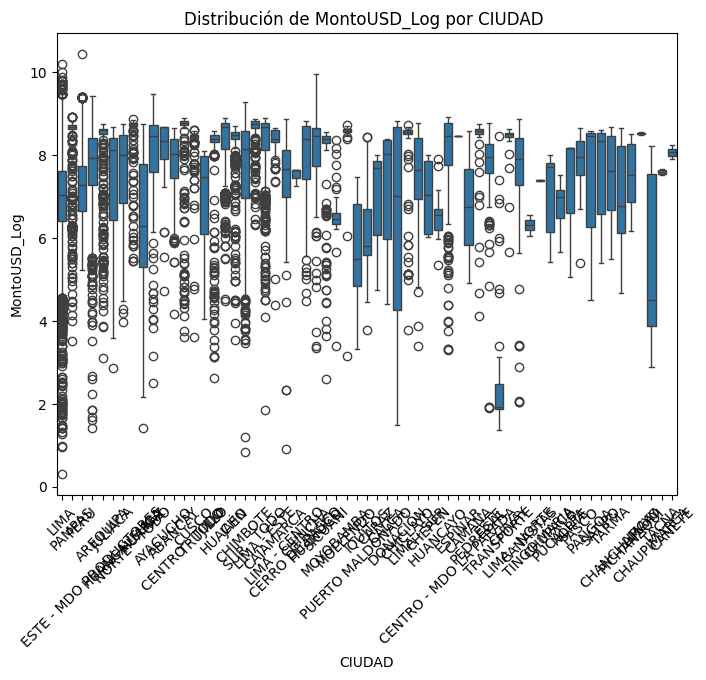

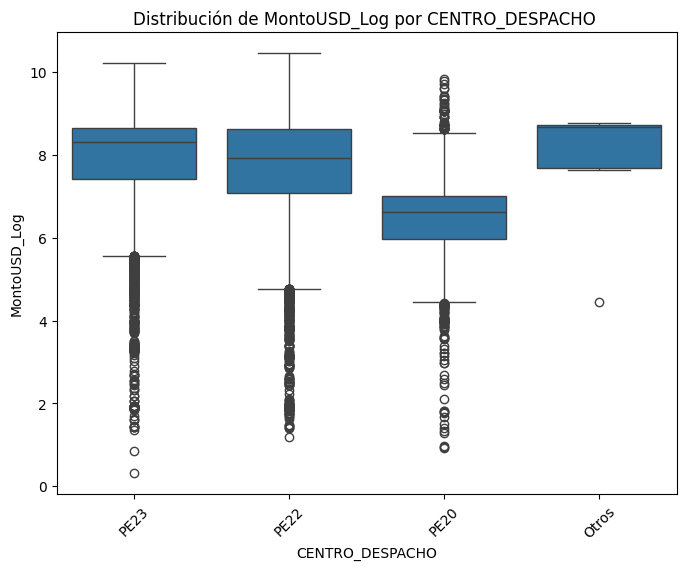

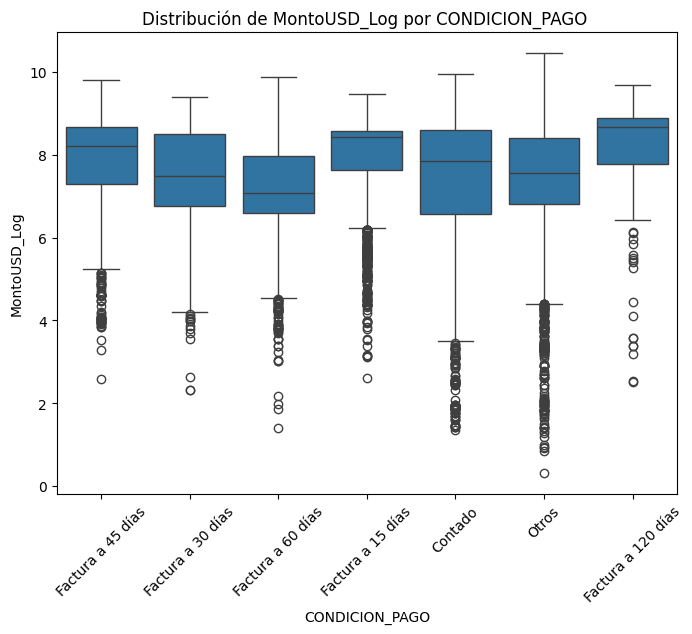

In [ ]:
for i in lista_cualitativas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_dataset, x=i, y="MontoUSD_Log")
    plt.title(f"Distribución de {target} por {i} ")
    plt.xticks(rotation=45)
    plt.show()

- El Monto USD varía ampliamente según el tipo de cliente y producto. Variables como SECTOR_CLIENTE, RUBRO_CLIENTE y COD_MATERIAL muestran mucha dispersión y outliers, lo que indica que ciertos sectores y productos específicos influyen fuertemente en el valor de las transacciones.

- A nivel geográfico, Lima, Arequipa, Trujillo y San Martín concentran un alto volumen y diversidad de montos, incluyendo muchos valores extremos. Esto también se refleja en distritos y ciudades con mayor actividad económica.

- En la variable CENTRO_DESPACHO, algunos centros como PE22 y PE23 destacan por su alta dispersión en montos, mientras que otros como PE30 registran más montos negativos, posiblemente por devoluciones.

- La CONDICION_PAGO influye notablemente en el monto. Las operaciones con crédito a 90 o 120 días tienden a tener montos más altos y variados, mientras que las ventas al contado suelen ser más uniformes y de menor valor.


En resumen se observa  que varias categorias se solapan y por lo tanto no generarian impacto en el modelo , sin embargo analizaremos agrupandolos nuevamente



/tmp/ipython-input-734345720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


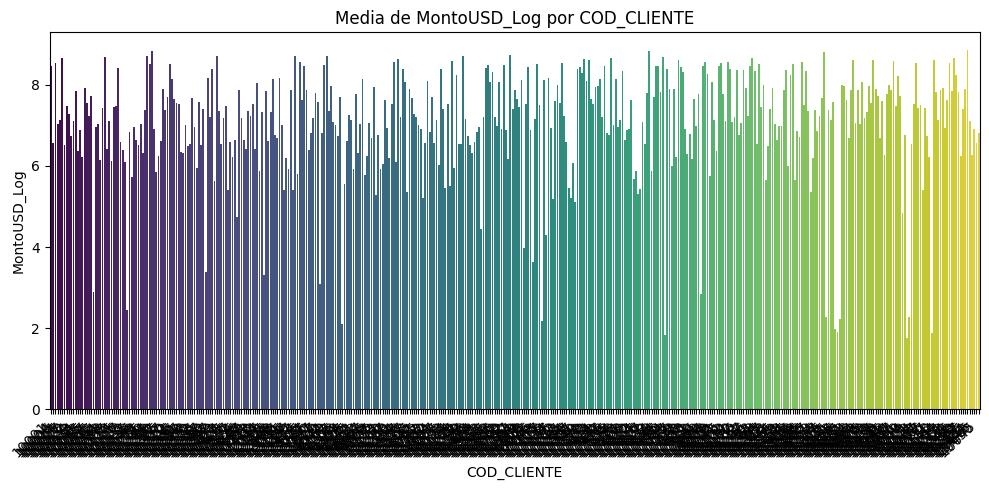

/tmp/ipython-input-734345720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


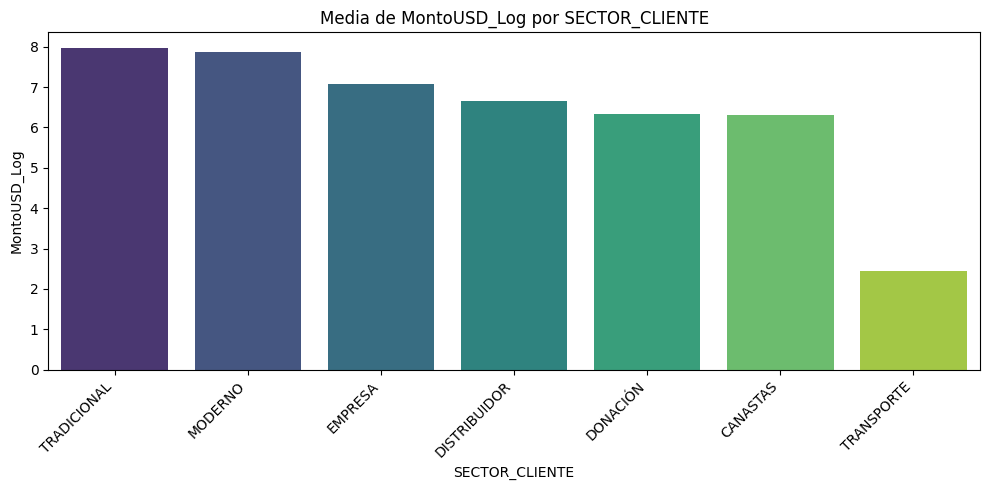

/tmp/ipython-input-734345720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


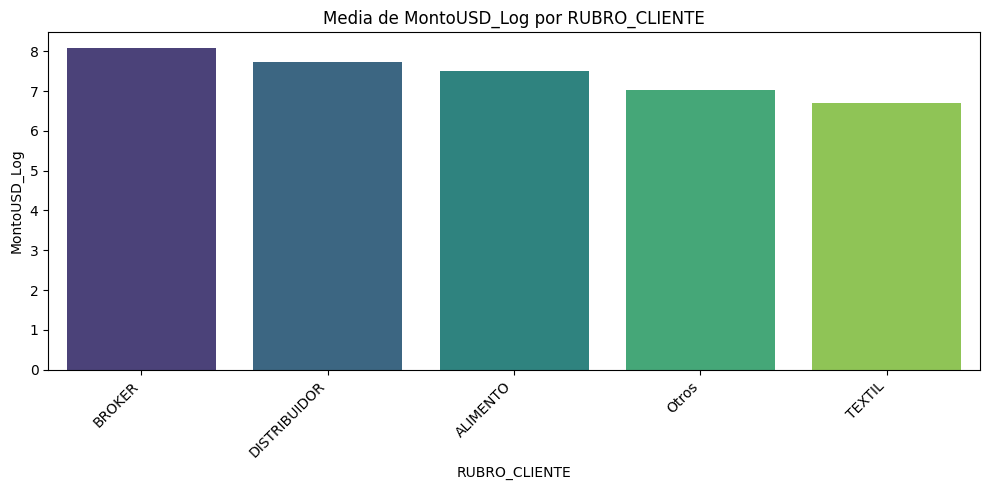

/tmp/ipython-input-734345720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


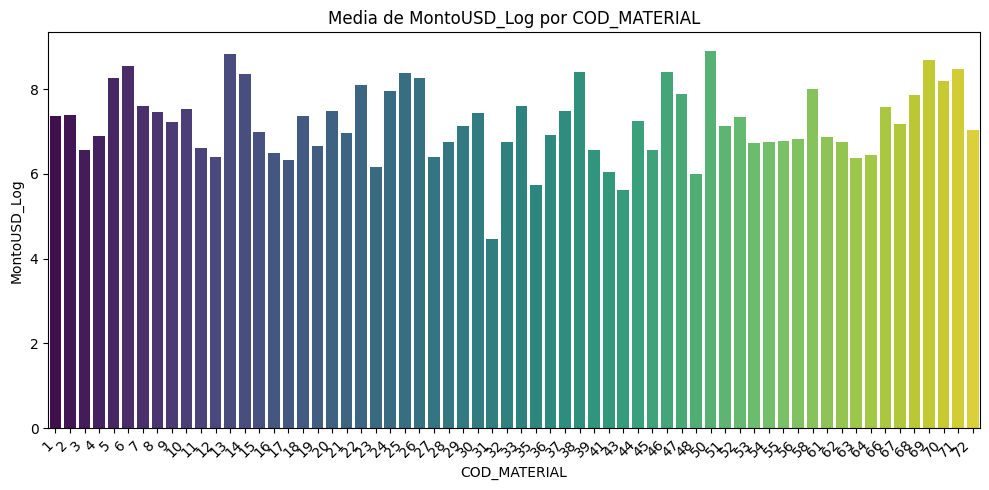

/tmp/ipython-input-734345720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


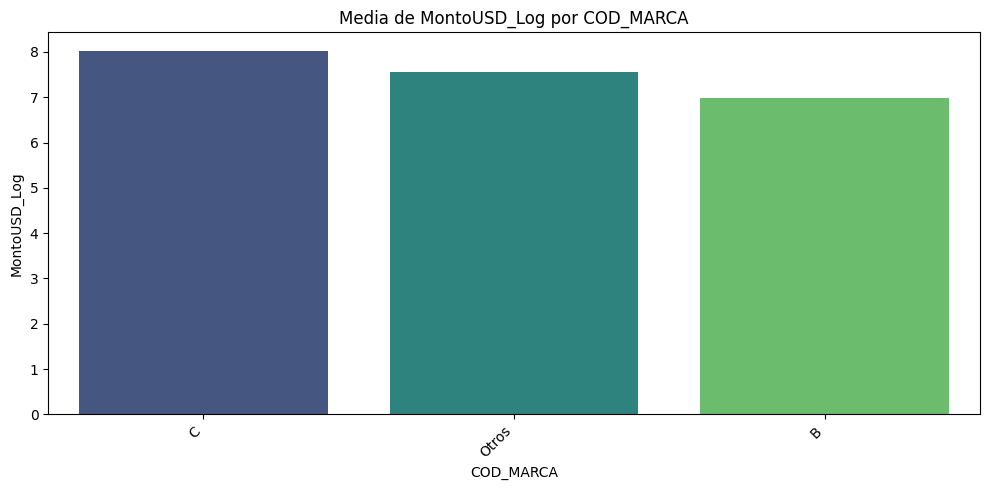

/tmp/ipython-input-734345720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


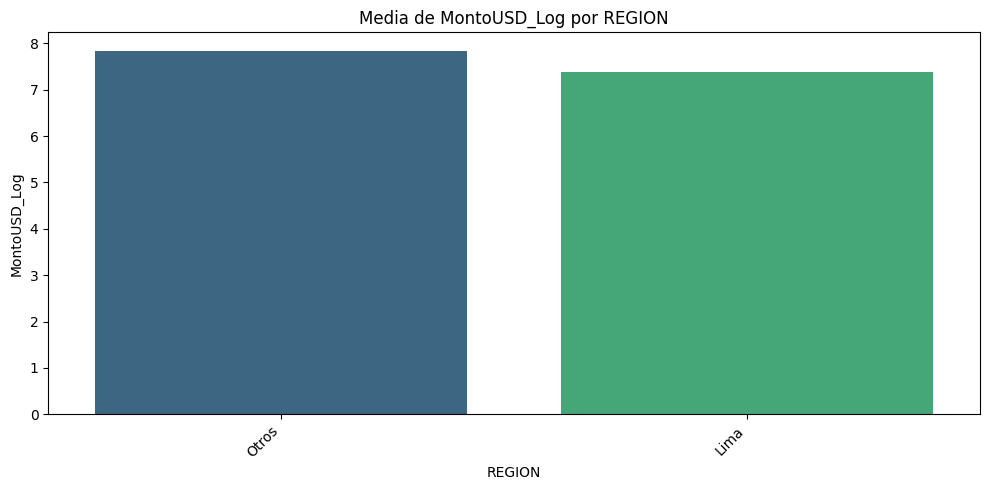

/tmp/ipython-input-734345720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


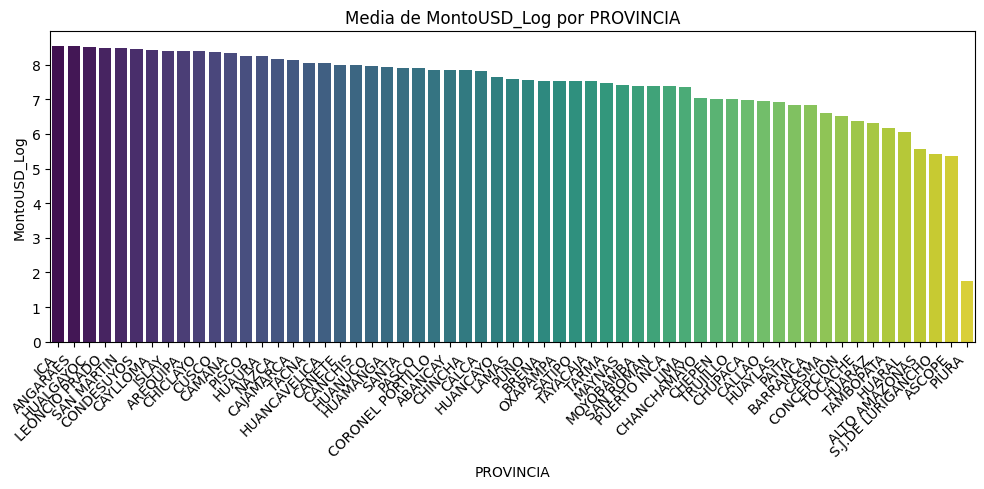

/tmp/ipython-input-734345720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


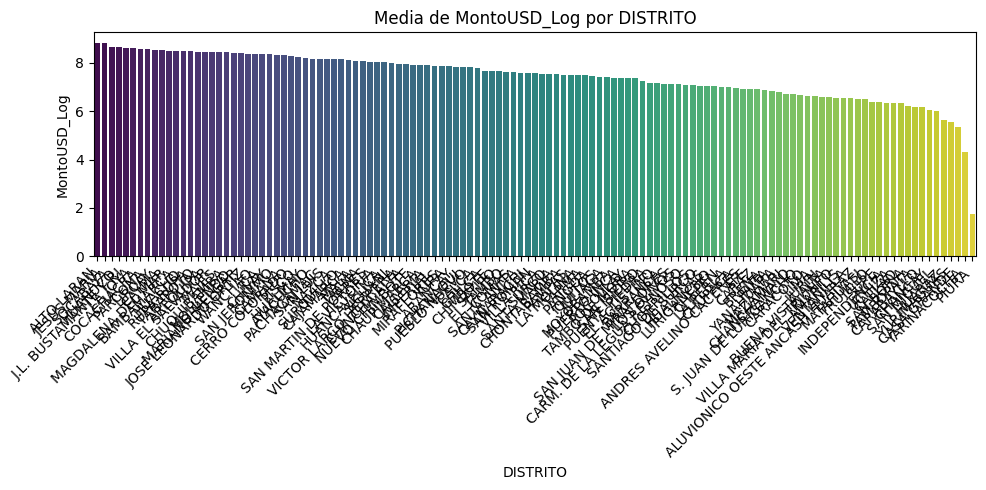

/tmp/ipython-input-734345720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


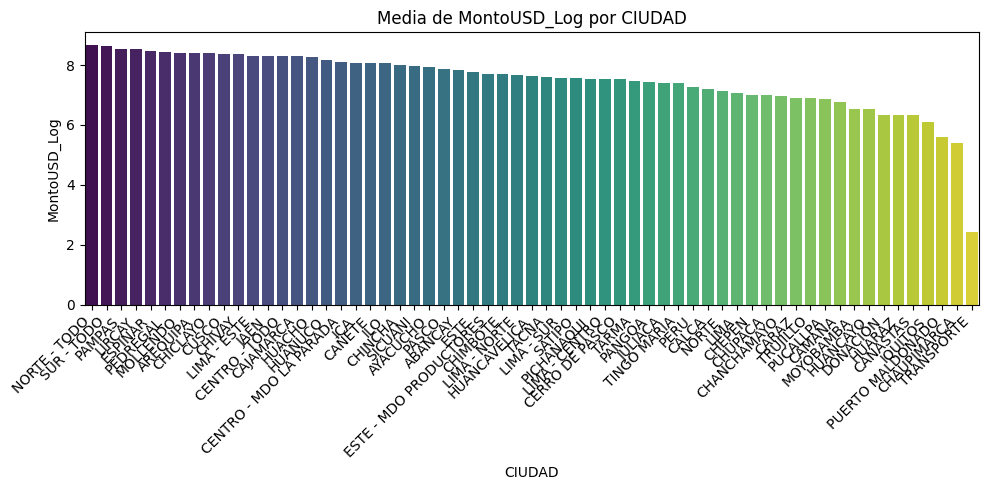

/tmp/ipython-input-734345720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


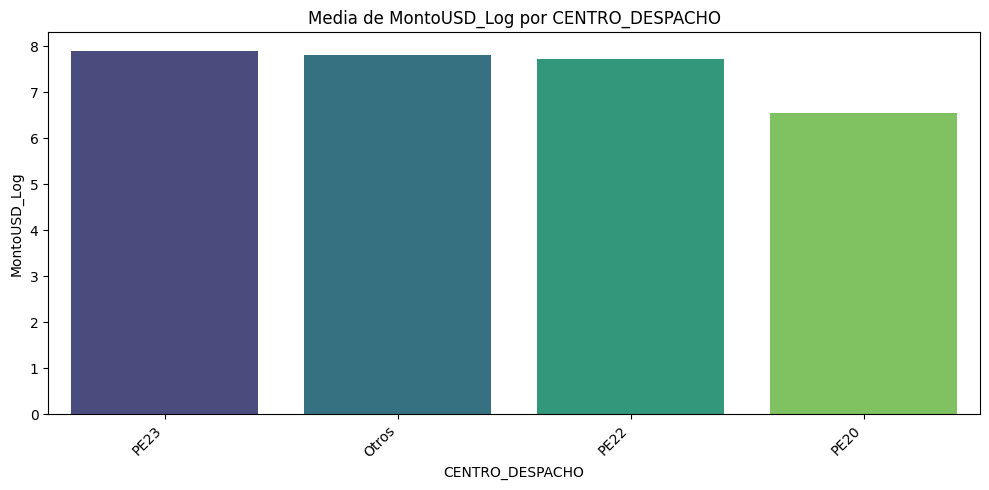

/tmp/ipython-input-734345720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target, data=mean_df, palette="viridis")


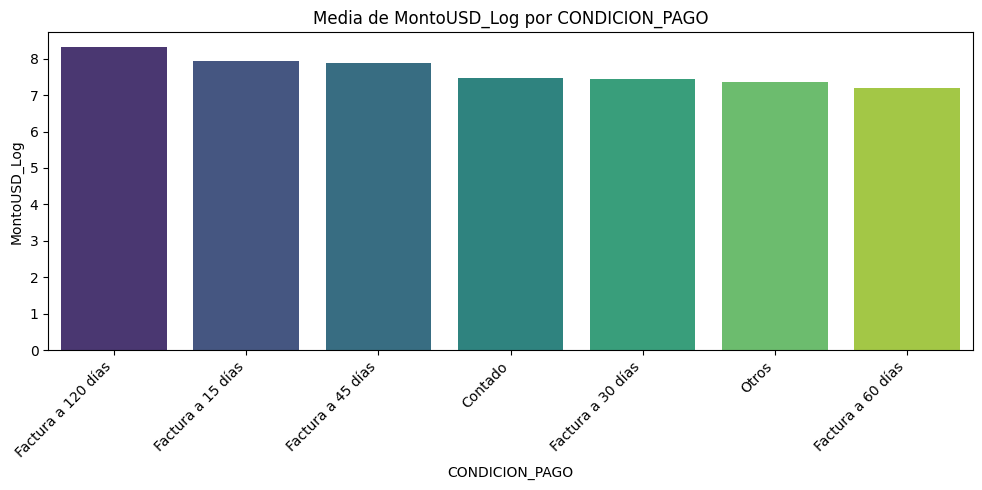

In [ ]:
for col in lista_cualitativas:
    plt.figure(figsize=(10, 5))

    # Calcular medias ordenadas
    mean_df = df_dataset.groupby(col)[target].mean().reset_index()
    mean_df = mean_df.sort_values(by=target, ascending=False)

    # Gráfico de barras de medias
    sns.barplot(x=col, y=target, data=mean_df, palette="viridis")

    plt.title(f'Media de {target} por {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

A partir del análisis con el boxplot y el gráfico de medias, optamos por agrupar las categorías que presentaban características similares, con el fin de aumentar su impacto sobre la variable objetivo.


In [ ]:

df_dataset["SECTOR_CLIENTE"]=df_dataset["SECTOR_CLIENTE"].apply(lambda x :"A" if x in ["EMPRESA","DISTRIBUIDOR"] else "B" if x in ["TRADICIONAL","MODERNO"] else "C" )
df_dataset["RUBRO_CLIENTE"]=df_dataset["RUBRO_CLIENTE"].apply(lambda x : "A" if x in ["ALIMENTO","Otros","TEXTIL"] else "B")
df_dataset["CENTRO_DESPACHO"]=df_dataset["CENTRO_DESPACHO"].apply(lambda x : "A" if x in ["PE23","P22","Otros"] else "B")

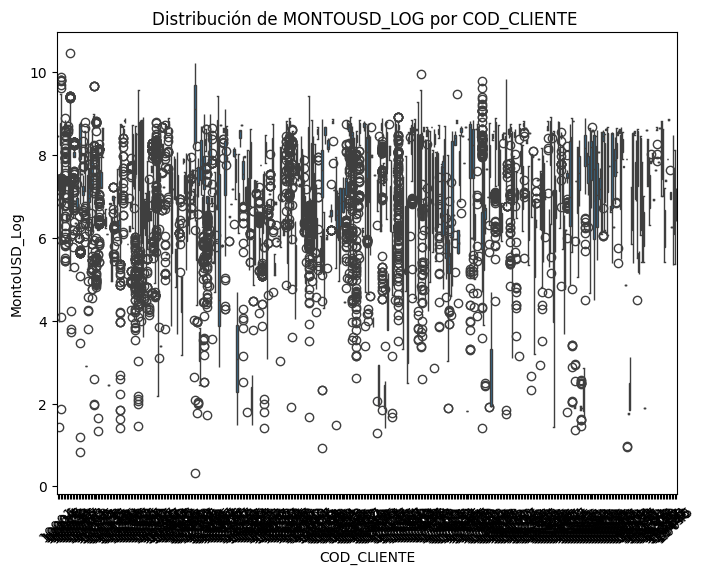

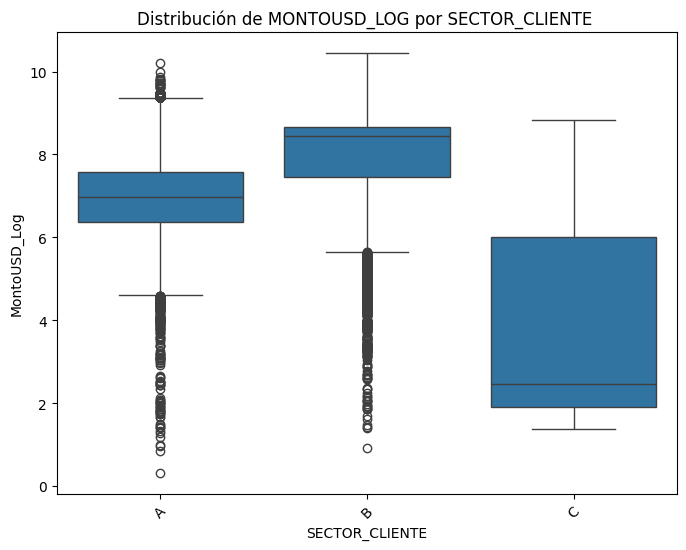

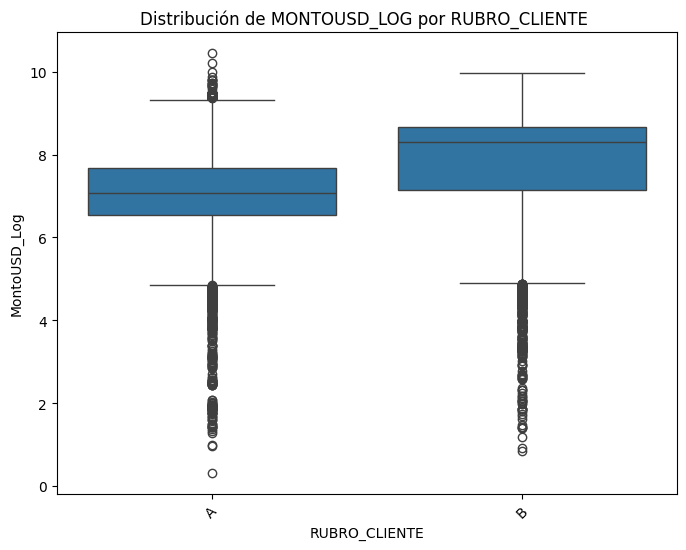

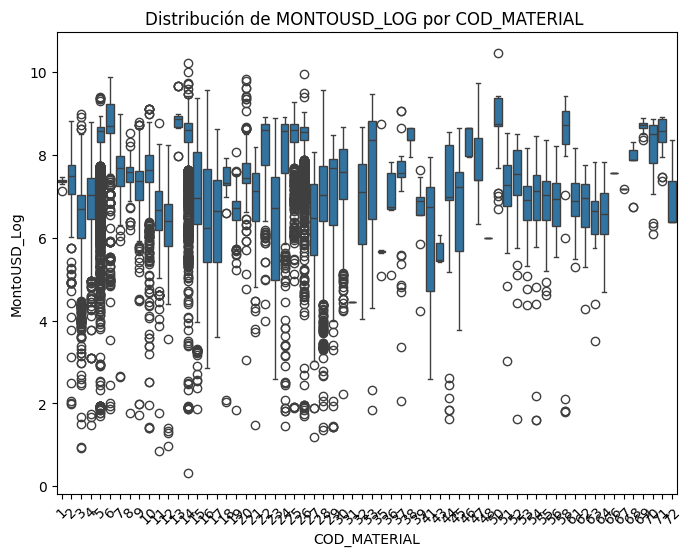

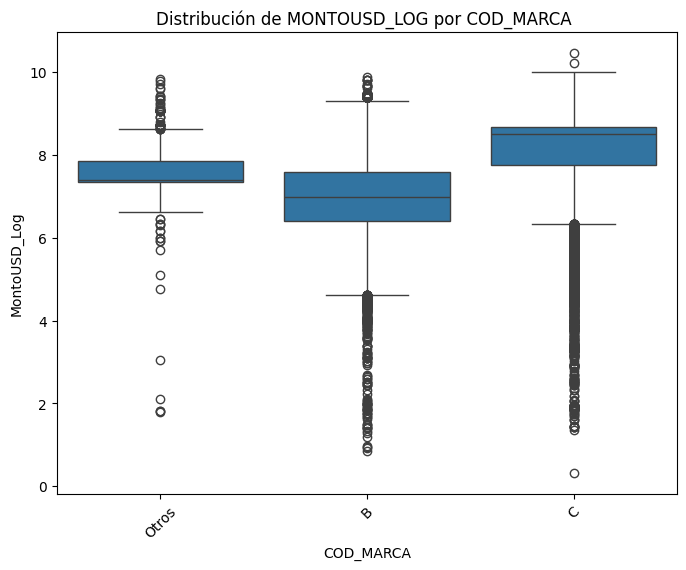

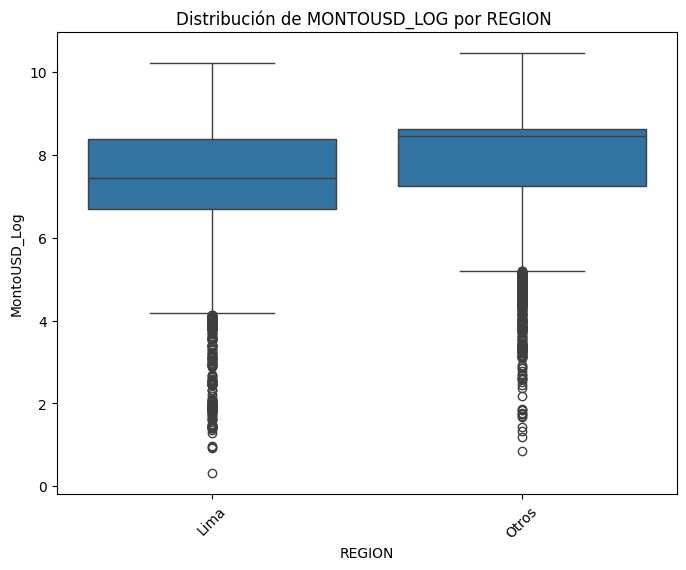

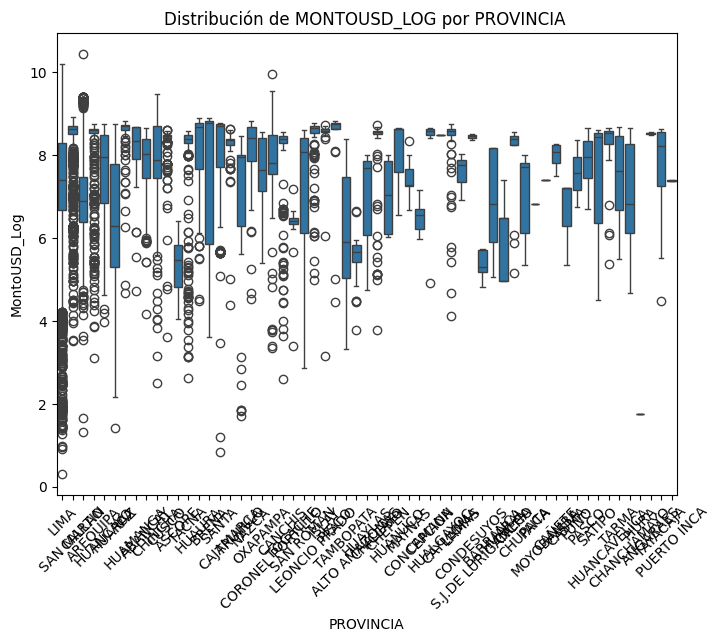

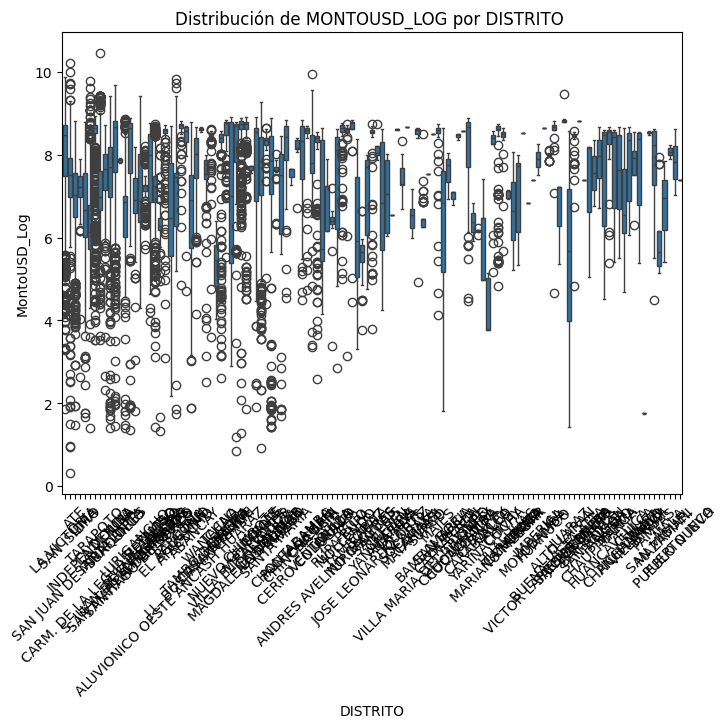

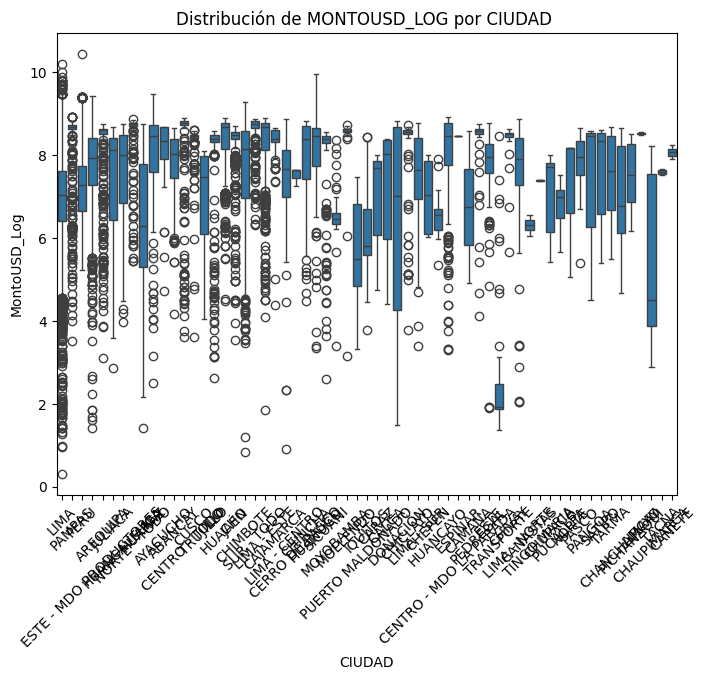

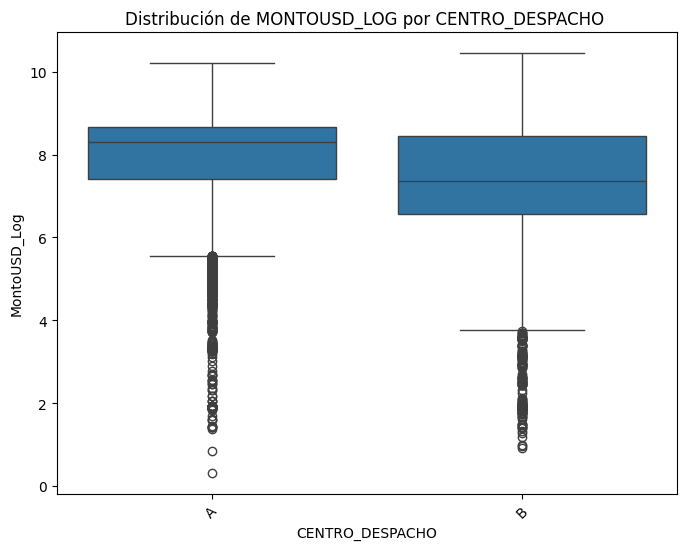

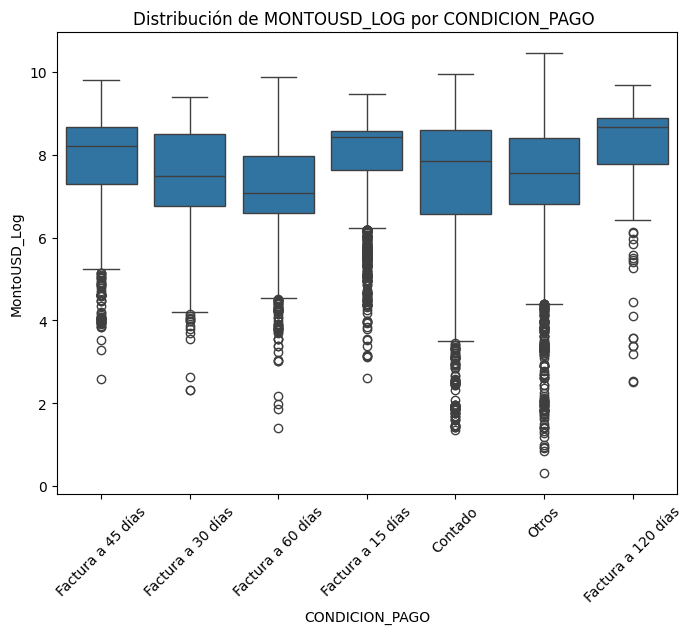

In [ ]:
for i in lista_cualitativas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_dataset, x=i, y="MontoUSD_Log")
    plt.title(f"Distribución de MONTOUSD_LOG por {i} ")
    plt.xticks(rotation=45)
    plt.show()

## Análisis de Correlación

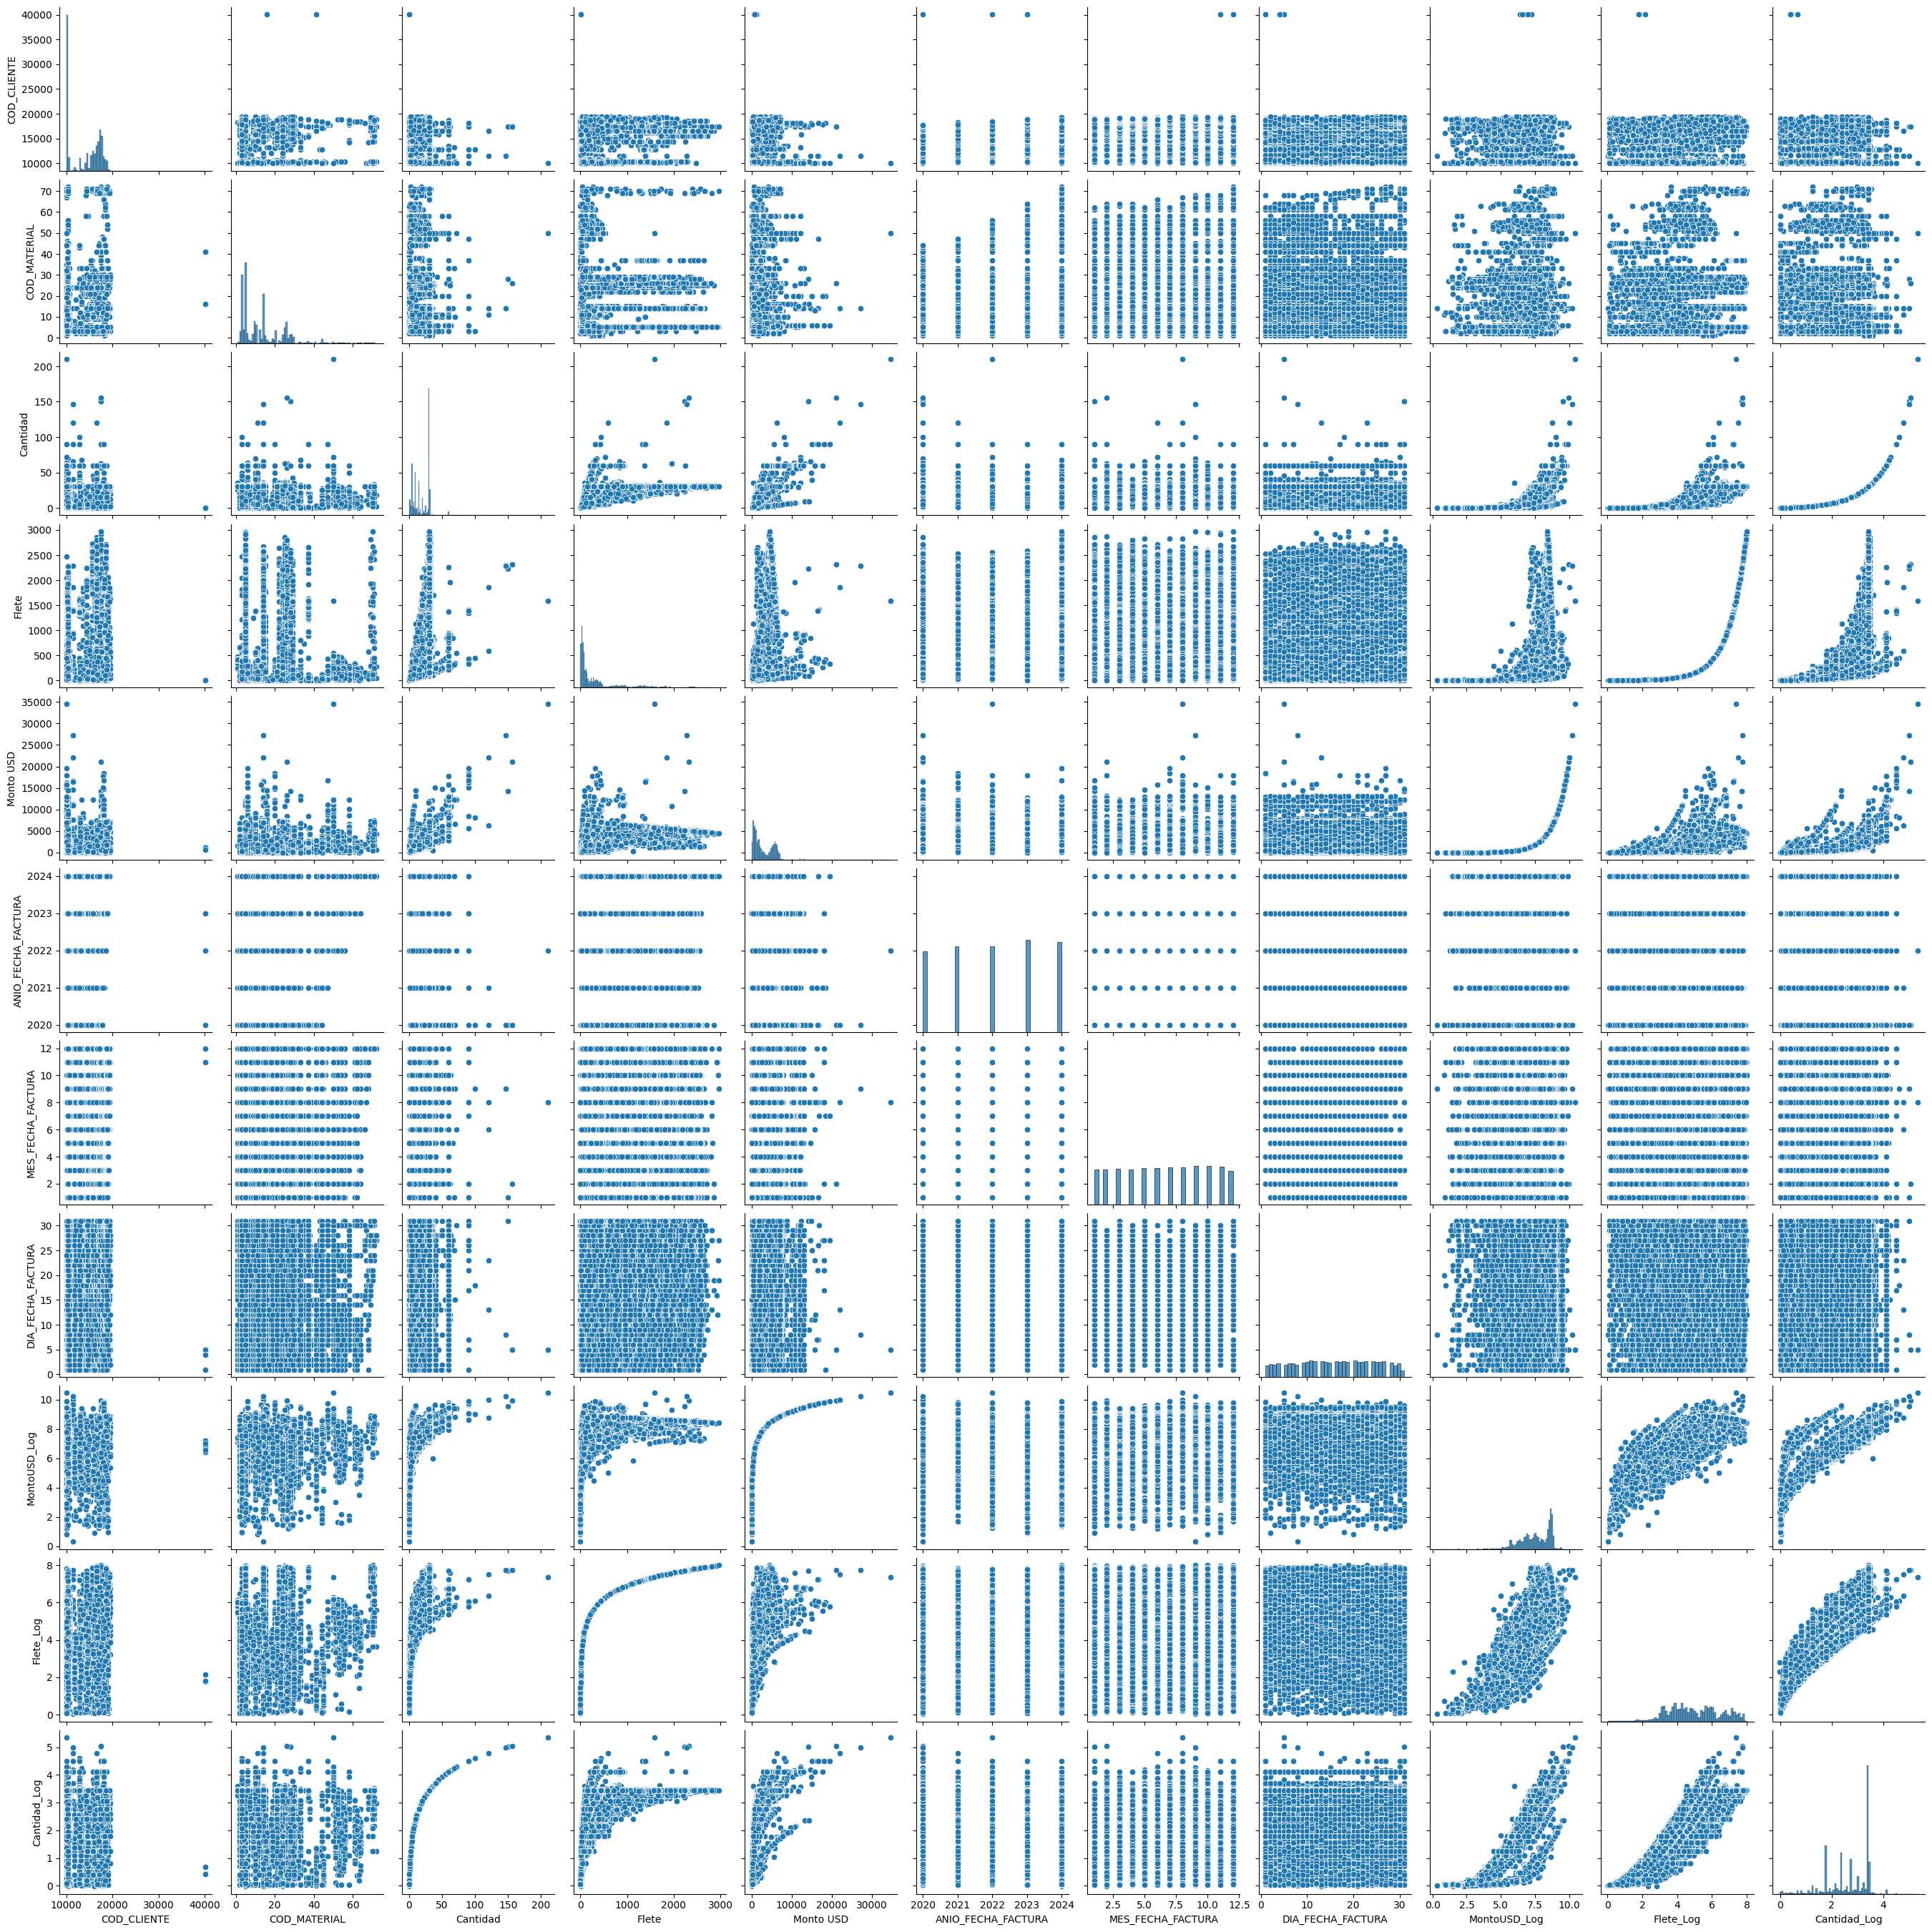

In [ ]:
sns.pairplot(df_dataset)


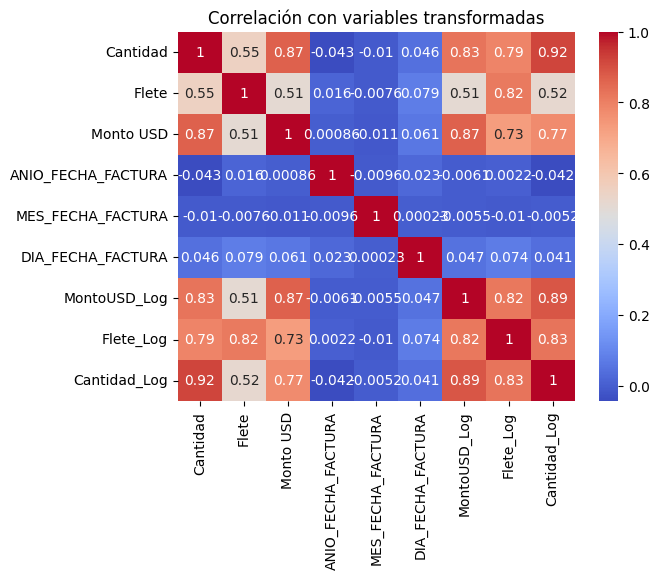

In [ ]:
sns.heatmap(df_dataset[lista_cuantitativas].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación con variables transformadas")
plt.show()

Nos concentramos en las variables logaritimas que son las que importan en nuestra ocasion



In [ ]:
df_dataset.columns


Index(['COD_CLIENTE', 'SECTOR_CLIENTE', 'RUBRO_CLIENTE', 'COD_MATERIAL',
       'COD_MARCA', 'REGION', 'PROVINCIA', 'DISTRITO', 'CIUDAD',
       'CENTRO_DESPACHO', 'CONDICION_PAGO', 'Cantidad', 'Flete', 'Monto USD',
       'ANIO_FECHA_FACTURA', 'MES_FECHA_FACTURA', 'DIA_FECHA_FACTURA',
       'MontoUSD_Log', 'Flete_Log', 'Cantidad_Log'],
      dtype='object')

Procederemos a borrar todas aaquellas variables que analizamos en el EDA y notamos que no impactan en el target



In [ ]:
df_dataset.drop(columns=["CONDICION_PAGO","ANIO_FECHA_FACTURA","MES_FECHA_FACTURA","DIA_FECHA_FACTURA","COD_CLIENTE","Cantidad","Flete","Monto USD","CIUDAD","DISTRITO","PROVINCIA","REGION","RUBRO_CLIENTE","COD_MATERIAL","SECTOR_CLIENTE"],inplace=True)
df_dataset.head()

COD_MARCA CENTRO_DESPACHO  MontoUSD_Log  Flete_Log  Cantidad_Log
0     Otros               A      7.365984   5.639528      3.466048
1         B               B      7.322616   3.952013      2.484907
2         B               B      7.082238   3.859255      2.397895
3         B               B      7.143618   3.859255      2.397895
4         B               B      6.995537   4.679535      3.044522

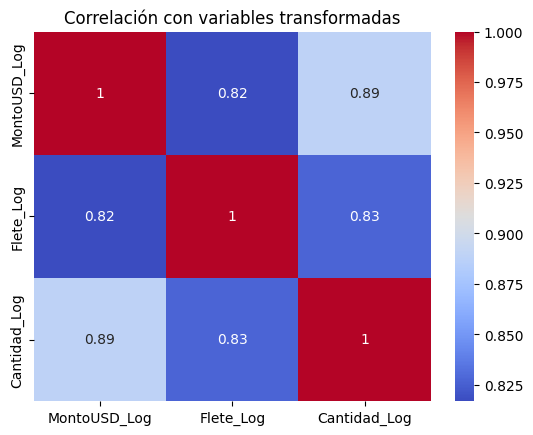

In [ ]:
corrmat = df_dataset.corr(numeric_only=True)

sns.heatmap(df_dataset[["MontoUSD_Log","Flete_Log","Cantidad_Log"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación con variables transformadas")
plt.show()

Se observa que las variables Flete_Log y Cantidad_Log presentan una fuerte relación con la variable objetivo MontoUSD_Log. Sin embargo, dichas variables también muestran una alta correlación entre sí, lo que indica la presencia de multicolinealidad. En este contexto, se opta por conservar la variable Cantidad, dado que representa de manera más directa la información relevante para el análisis y, además, el flete es una variable derivada de la cantidad.



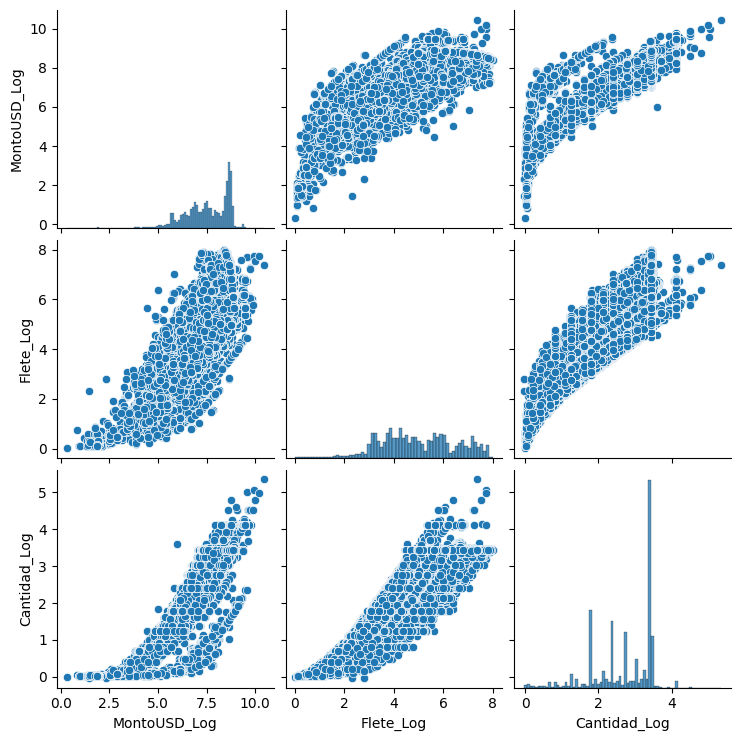

In [ ]:
sns.pairplot(df_dataset)


In [ ]:
df_dataset.drop(columns=["Flete_Log"],inplace=True)

In [ ]:
df_dataset.dropna(inplace=True)

## Encoding (Dummy)

In [ ]:
df_encoded = pd.get_dummies(df_dataset, columns=['COD_MARCA', 'CENTRO_DESPACHO'], drop_first=True)
df_encoded.head()

MontoUSD_Log  Cantidad_Log  COD_MARCA_C  COD_MARCA_Otros  CENTRO_DESPACHO_B
0      7.365984      3.466048        False             True              False
1      7.322616      2.484907        False            False               True
2      7.082238      2.397895        False            False               True
3      7.143618      2.397895        False            False               True
4      6.995537      3.044522        False            False               True

## Construción del modelo (Regresión o Clasificación)

Como sabemos, cuando usamos modelos lineales, estos son sensibles a numeros grandes ya que le darian mucha importancia. Por lo tanto , se escalaria los datos



In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df_encoded.drop(columns=["MontoUSD_Log"])
y = df_encoded["MontoUSD_Log"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Comparacion y evaluacion de modelos lineales


In [ ]:
modelos = {
    "LinearRegression": LinearRegression(),
    "RidgeCV": RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5),
    "LassoCV": LassoCV(alphas=np.logspace(-4, 4, 100), cv=5, max_iter=10000),
    "ElasticNetCV": ElasticNetCV(alphas=np.logspace(-4, 4, 100),
                                 l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, max_iter=10000)
}

In [ ]:
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{nombre} - R2 promedio (CV): {np.mean(scores):.4f} | Std: {np.std(scores):.4f}")

LinearRegression - R2 promedio (CV): 0.8444 | Std: 0.0026
RidgeCV - R2 promedio (CV): 0.8444 | Std: 0.0026
LassoCV - R2 promedio (CV): 0.8444 | Std: 0.0026
ElasticNetCV - R2 promedio (CV): 0.8444 | Std: 0.0026


In [ ]:

for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"{nombre} → R2 test: {r2:.4f} | MSE test: {mse:.4f}")

LinearRegression → R2 test: 0.8435 | MSE test: 0.2059
RidgeCV → R2 test: 0.8435 | MSE test: 0.2059
LassoCV → R2 test: 0.8435 | MSE test: 0.2059
ElasticNetCV → R2 test: 0.8435 | MSE test: 0.2059


Como resultado final , notamos que el modelo no tiene overfitting, el r2 del train es similar al de test , y notamos que tiene un buen R2 de 0.8469, con cualquiera de los 4 modelos



## Comparacion y evaluacion de modelos no lineales


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_tree = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
grid_tree = GridSearchCV(dt, param_grid_tree, cv=5, scoring='r2', n_jobs=-1)
grid_tree.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros - Árbol de Decisión:")
print(grid_tree.best_params_)
print(f"R2 en CV: {grid_tree.best_score_:.4f}")

Mejores hiperparámetros - Árbol de Decisión:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
R2 en CV: 0.8964


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:

rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros - Random Forest:")
print(grid_rf.best_params_)
print(f"R2 en CV: {grid_rf.best_score_:.4f}")

Mejores hiperparámetros - Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R2 en CV: 0.8976


Notamos que aqui subio notablemente el R2 comparandolos con los modelos lineales, y es ligeramente mejor que el arbol de decision por unos decimales.



# 📊 Conclusiones y Recomendaciones

## ✅ Conclusiones
- Los **modelos lineales** (Linear Regression, Ridge, Lasso y Elastic Net) alcanzaron un desempeño estable con **R² = 84.69%** y **MSE = 0.2034**, capturando relaciones básicas en los datos.  
- Los **modelos no lineales** mostraron un mejor desempeño:  
  - 🌳 **Árbol de Decisión:** R² = *89.64*%  
  - 🌲 **Random Forest:** R² = 89.76% (**mejor modelo**)  
- No se observaron indicios de **sobreajuste** (R² entrenamiento ≈ R² prueba).  
- La **transformación logarítmica** de la variable objetivo resultó efectiva para mejorar la precisión.  
- Las **variables categóricas codificadas** aportaron un valor predictivo significativo.  
- **Random Forest** se confirma como el modelo más **robusto y confiable** para este caso.  

---

## 🚀 Recomendaciones
- **Implementar Random Forest** como modelo principal de predicción de ventas.  
- Utilizar las predicciones para apoyar decisiones estratégicas de **RetailPlus** en:  
  - 📦 **Optimización de inventarios:** ajustar la oferta por región y cliente.  
  - 💳 **Condiciones de pago:** diseñar estrategias diferenciadas según perfil del cliente.  
  - 📈 **Crecimiento de mercado:** identificar segmentos con mayor potencial.  
- Realizar un **monitoreo periódico** del modelo para asegurar su vigencia con nuevos datos.  
- Explorar en el futuro modelos de **machine learning avanzado** (Gradient Boosting, XGBoost, LightGBM) como alternativas de mejora.  
